In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib as mplib
from matplotlib import pyplot as plt
import seaborn as sns
import pyro
import seaborn as sns

C:\Users\Kobo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
data = pd.read_csv("Data/Data_processed.csv", sep=';')
# data.info()
# only keep the columns we need

data = data[['continent', 'Country', 'Life expectancy ', 'Year', 'infant deaths', 'Alcohol', 'Population', 'GDP', 'Schooling', 'Status', 'WaterFacility', 'WomenInParlament', 'MeaslesPrMillion']]

# year = 2014
# d = data[data['Year'] == year]
# # sort data by counytrn name
# d = d.sort_values(by='Country')

# for col in data.columns:
#     # convert to numpy and print sorted alphabetically by country
#     for i, v in enumerate(d[col].values):
#         print(d['Country'].values[i], v)


#     plt.plot(d[col], d['Life expectancy '], 'o', color='blue')
#     plt.title(year)
#     plt.xlabel(col)
#     plt.ylabel('Life expectancy ')
#     # annotate each point with country name
#     for i, txt in enumerate(d['Country']):
#         plt.annotate(txt, (d[col].iloc[i], d['Life expectancy '].iloc[i]))
#     plt.show()


In [39]:
# for each country and year change the life expectancy to the difference between life expectancy of this and the next year
import time
data = pd.read_csv("Data/Data_processed.csv", sep=';')
data = data[['continent', 'Country', 'Life expectancy ', 'Year', 'infant deaths', 'Alcohol', 'Population', 'GDP', 'Schooling', 'Status', 'WaterFacility', 'WomenInParlament', 'MeaslesPrMillion']]

# make new column to store the difference in life expectancy
data['Life expectancy difference'] = 0
# get difference in life expectancy for each country and year
for country in data['Country'].unique():
    d = data[data['Country'] == country]
    # sort by year
    d = d.sort_values(by='Year')
    # get difference in life expectancy
    d['Life expectancy difference'] = d['Life expectancy '].diff()
    # replace first value with 0
    d['Life expectancy difference'].iloc[0] = 0
    # replace nan values with 0
    d['Life expectancy difference'] = d['Life expectancy difference'].fillna(0)
    # replace old values with new values
    data[data['Country'] == country] = d

C:\Users\Kobo\AppData\Local\Temp\ipykernel_4528\1941058084.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Life expectancy difference'].iloc[0] = 0
C:\Users\Kobo\AppData\Local\Temp\ipykernel_4528\1941058084.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Life expectancy difference'].iloc[0] = 0
C:\Users\Kobo\AppData\Local\Temp\ipykernel_4528\1941058084.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Life expecta

In [41]:
# plot life expectancy of each country over time
# for country in data['Country'].unique():
#     d = data[data['Country'] == country]
#     plt.plot(d['Year'], d['Life expectancy difference'], label=country)
#     plt.legend()
#     plt.show()  

In [42]:
# create a new column to store difference in life expectancy for 1, 2 and 3 years in the past
data['Life expectancy difference 1 year ago'] = 0
data['Life expectancy difference 2 years ago'] = 0
data['Life expectancy difference 3 years ago'] = 0
# get difference in life expectancy for each country and year
for country in data['Country'].unique():
    d = data[data['Country'] == country]
    # sort by year
    d = d.sort_values(by='Year')
    # get difference in life expectancy
    d['Life expectancy difference 1 year ago'] = d['Life expectancy difference'].shift(1)
    d['Life expectancy difference 2 years ago'] = d['Life expectancy difference'].shift(2)
    d['Life expectancy difference 3 years ago'] = d['Life expectancy difference'].shift(3)
    # replace first value with 0
    d['Life expectancy difference 1 year ago'].iloc[0] = 0
    d['Life expectancy difference 2 years ago'].iloc[0] = 0
    d['Life expectancy difference 3 years ago'].iloc[0] = 0
    # replace nan values with 0
    d['Life expectancy difference 1 year ago'] = d['Life expectancy difference 1 year ago'].fillna(0)
    d['Life expectancy difference 2 years ago'] = d['Life expectancy difference 2 years ago'].fillna(0)
    d['Life expectancy difference 3 years ago'] = d['Life expectancy difference 3 years ago'].fillna(0)
    # replace old values with new values
    data[data['Country'] == country] = d

C:\Users\Kobo\AppData\Local\Temp\ipykernel_4528\1928427414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Life expectancy difference 1 year ago'].iloc[0] = 0
C:\Users\Kobo\AppData\Local\Temp\ipykernel_4528\1928427414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Life expectancy difference 2 years ago'].iloc[0] = 0
C:\Users\Kobo\AppData\Local\Temp\ipykernel_4528\1928427414.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

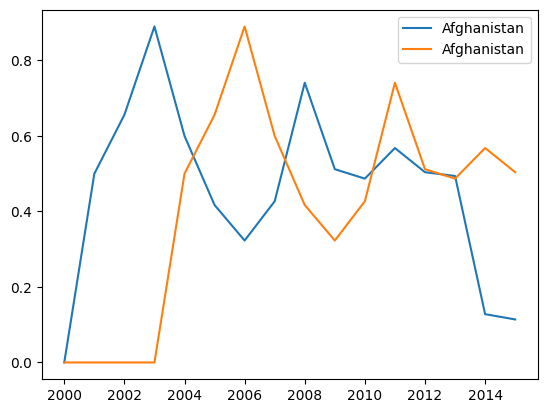

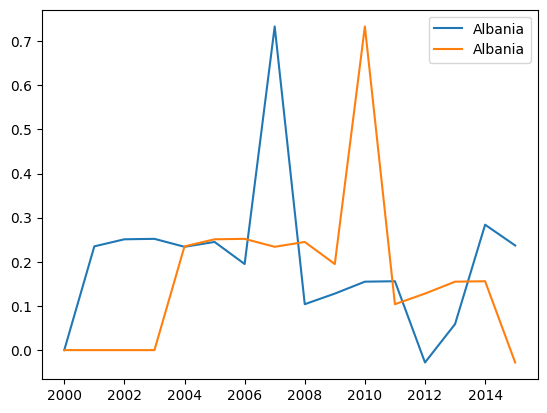

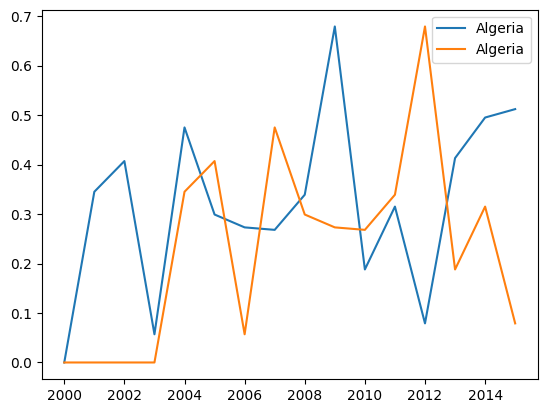

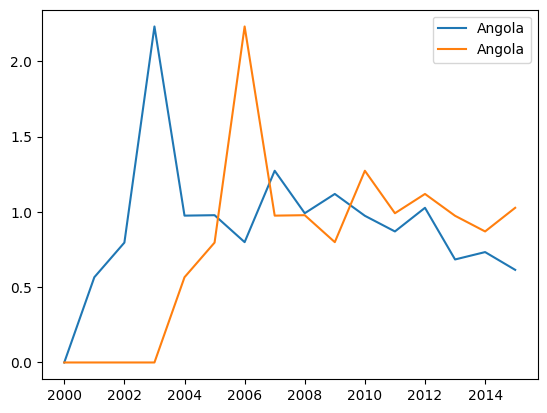

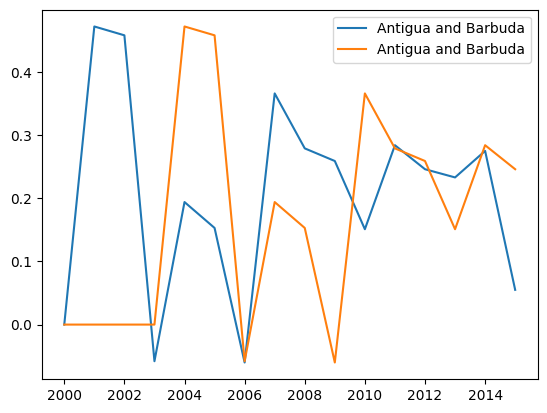

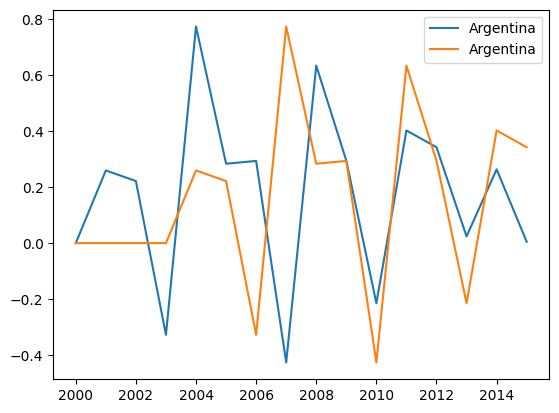

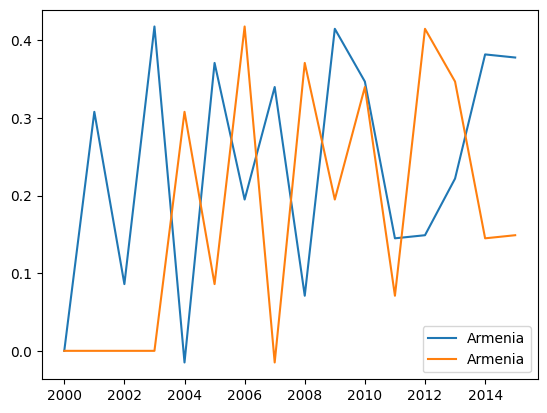

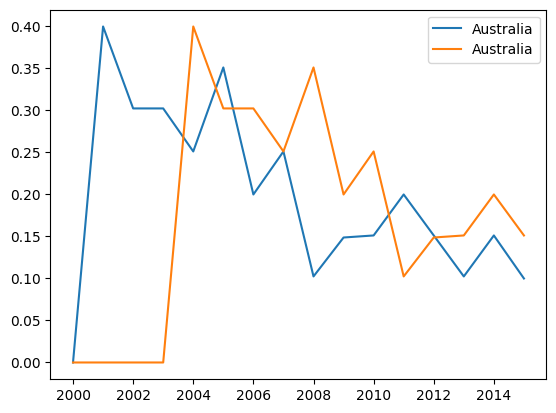

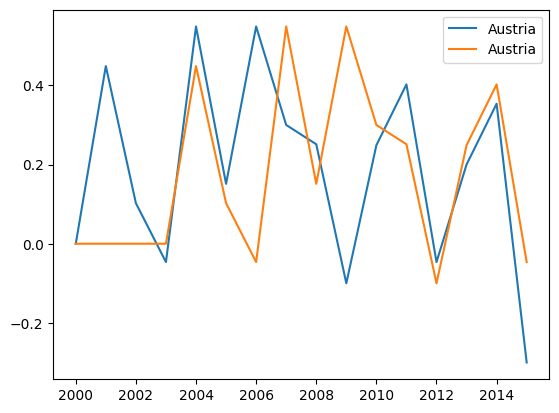

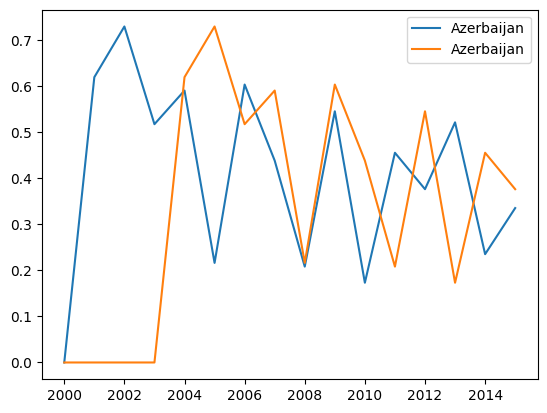

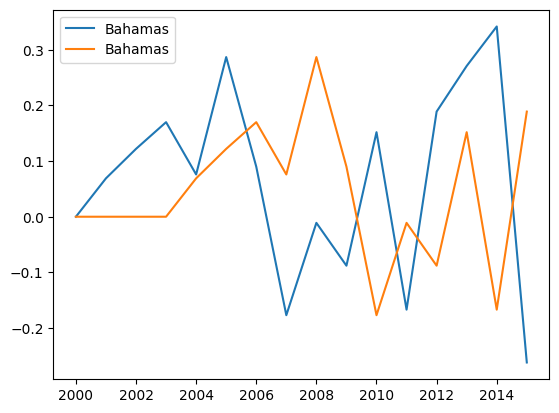

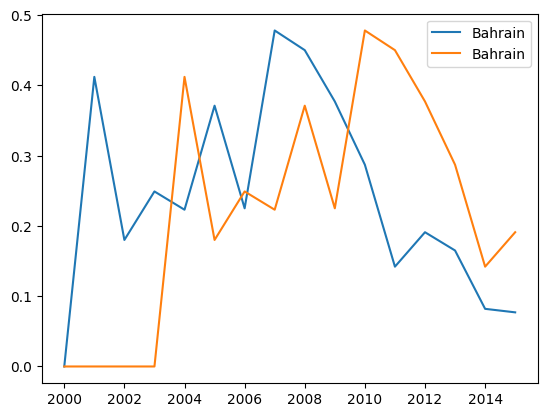

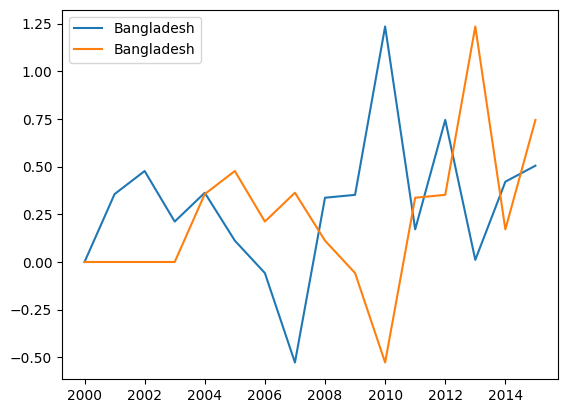

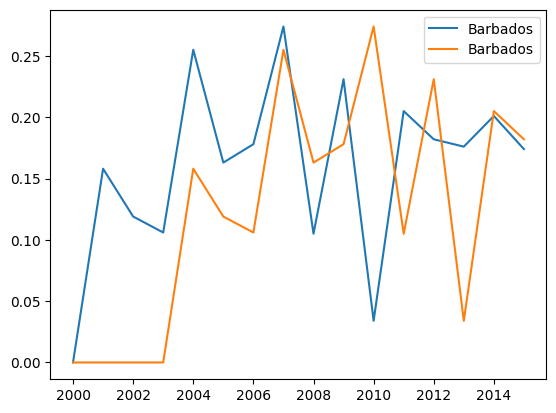

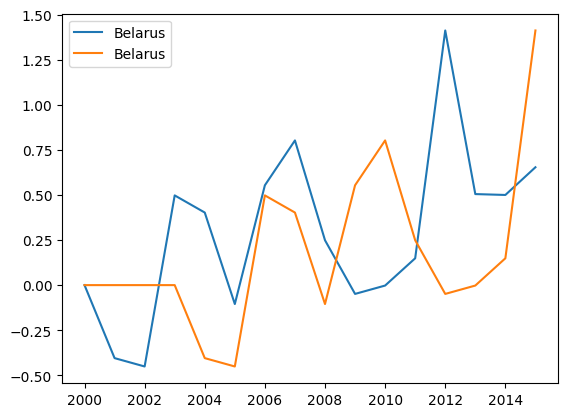

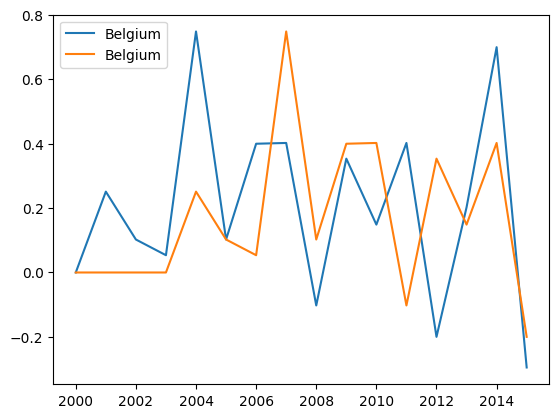

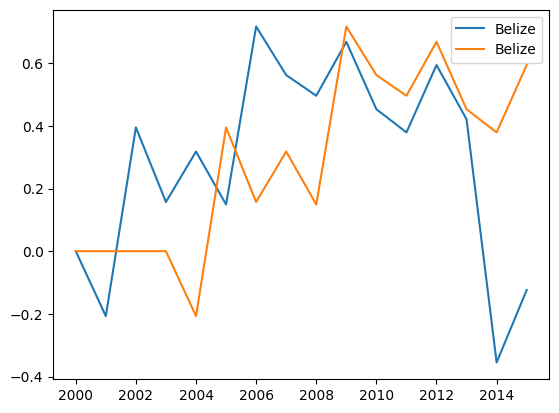

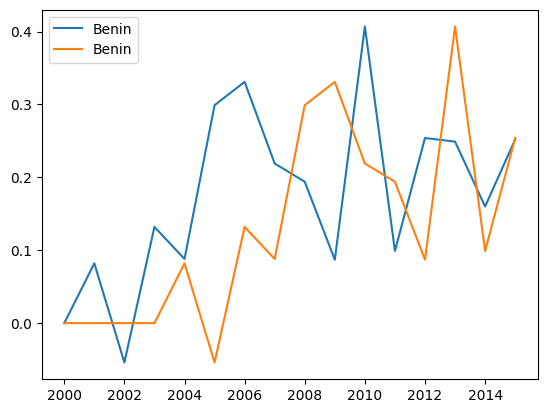

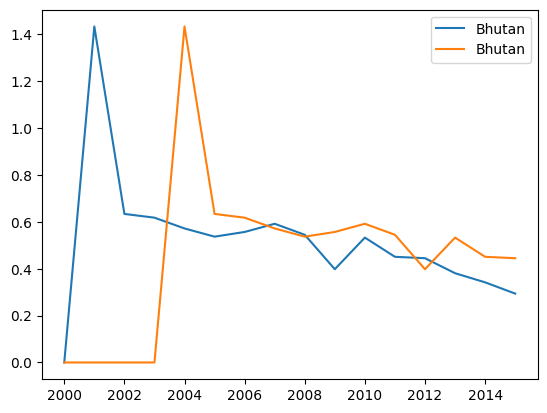

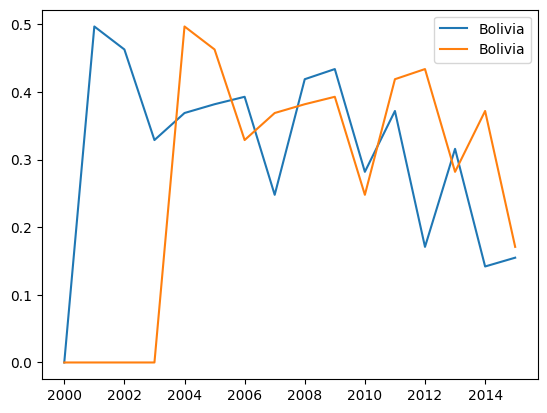

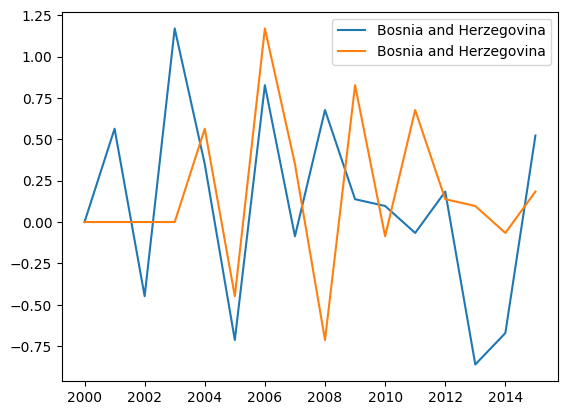

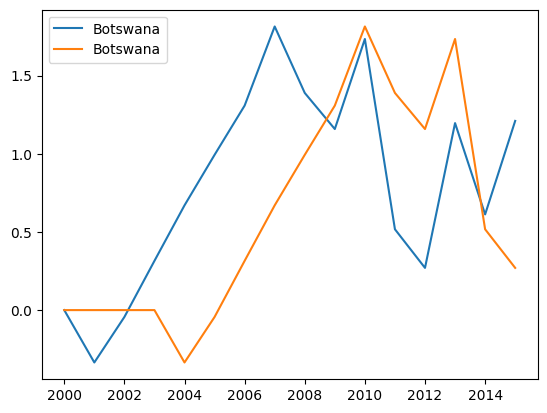

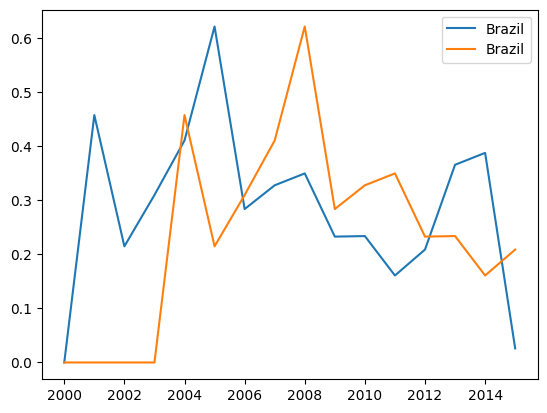

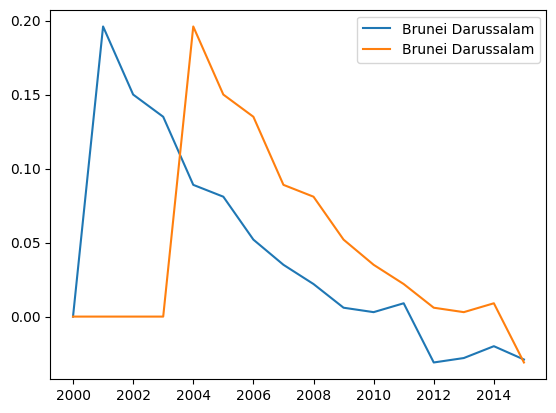

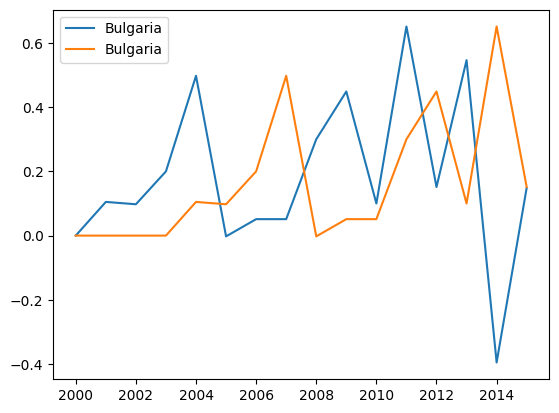

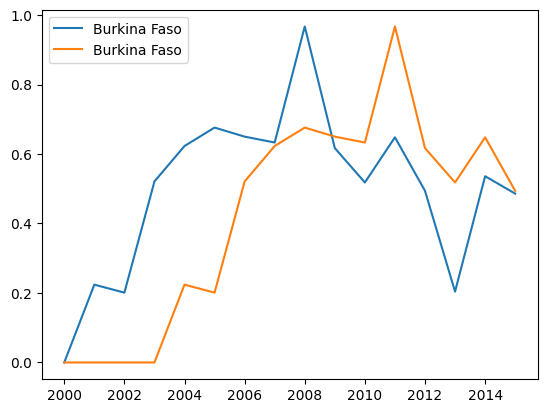

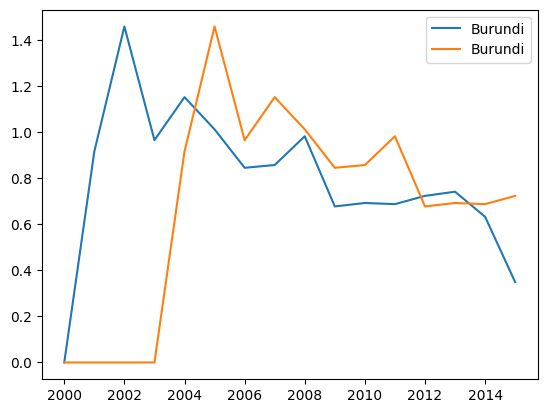

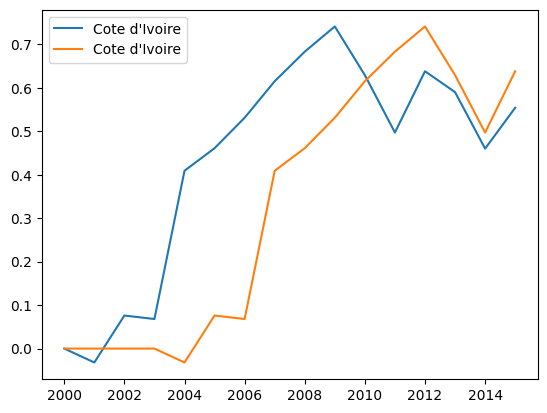

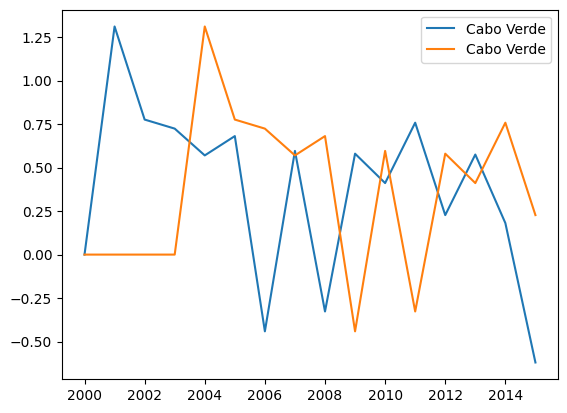

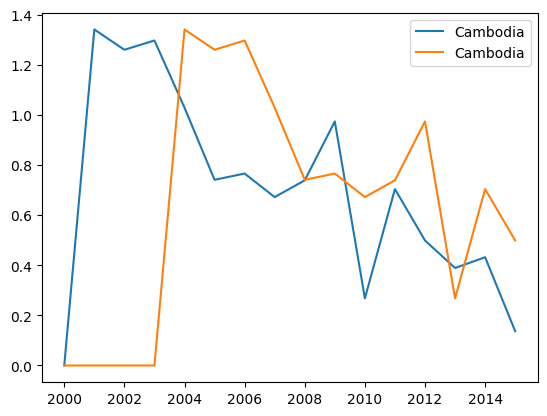

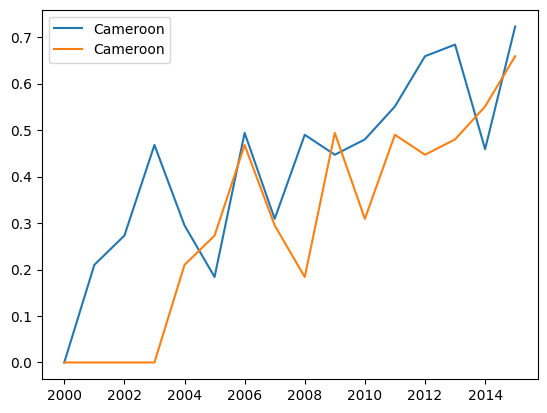

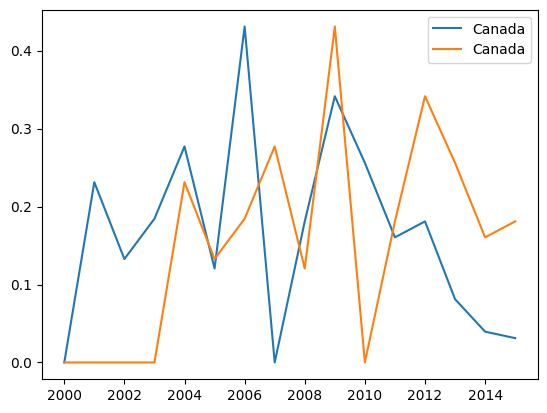

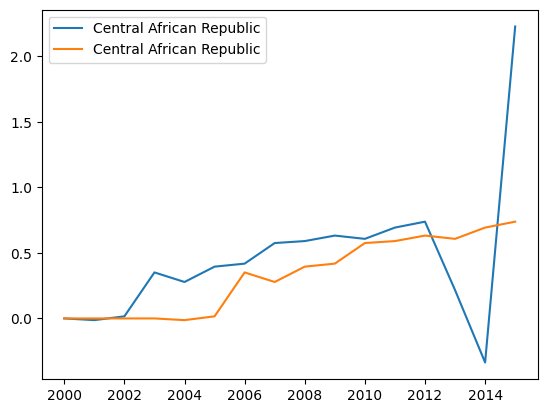

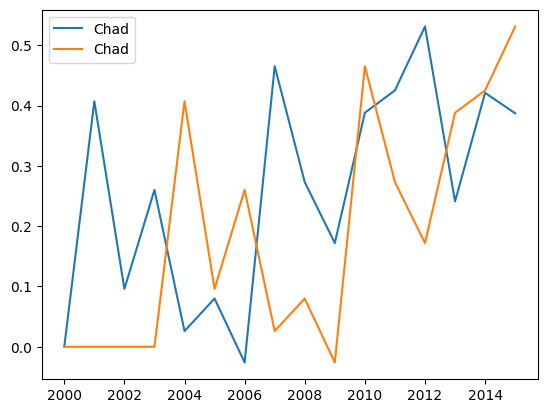

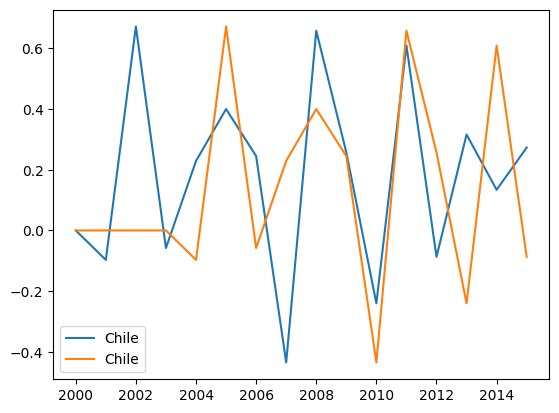

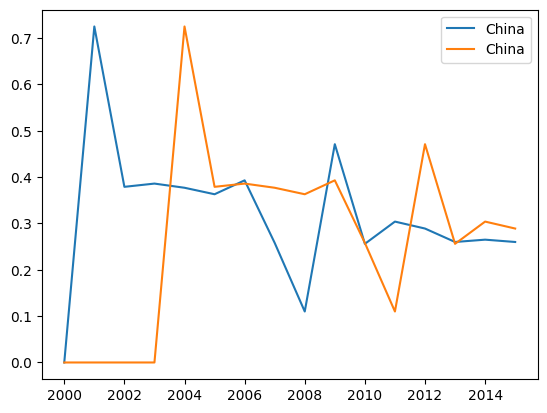

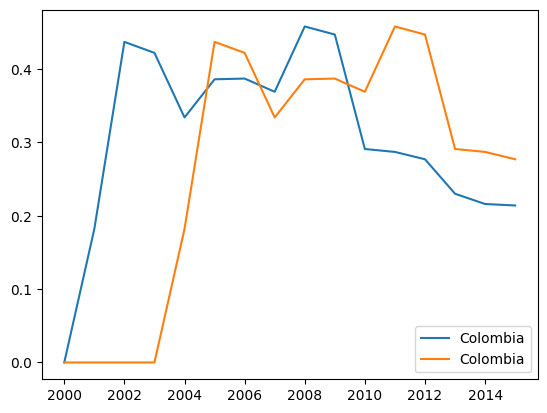

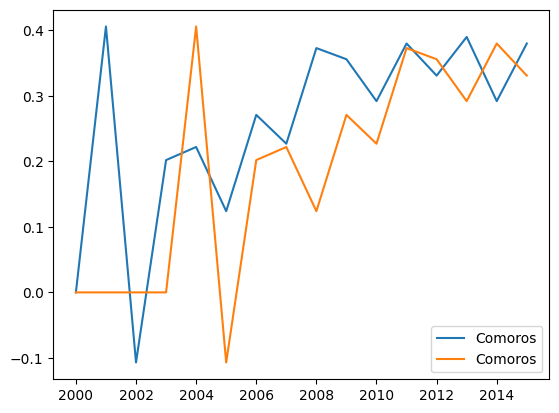

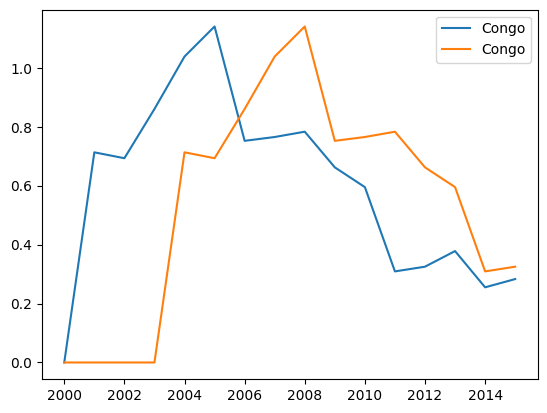

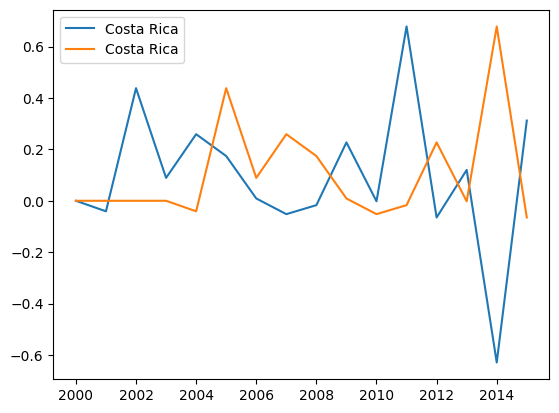

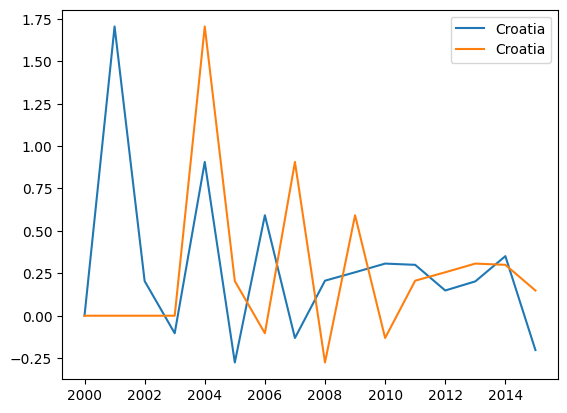

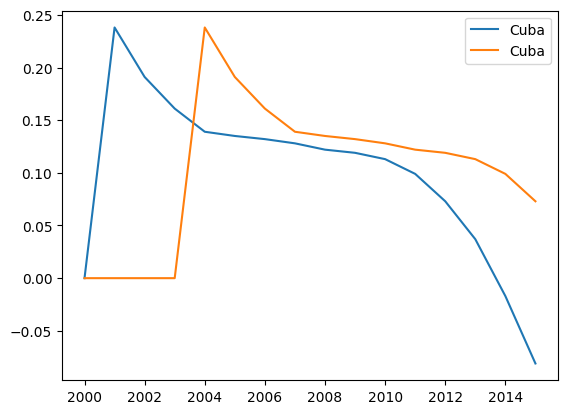

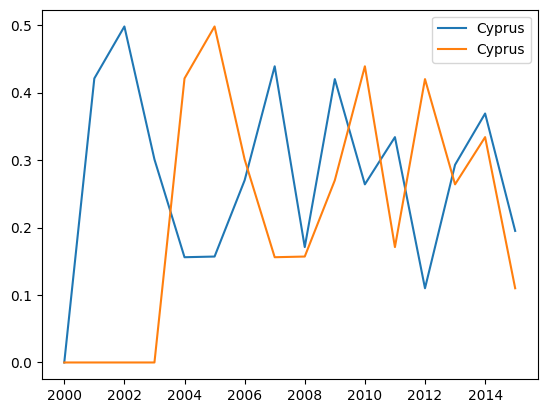

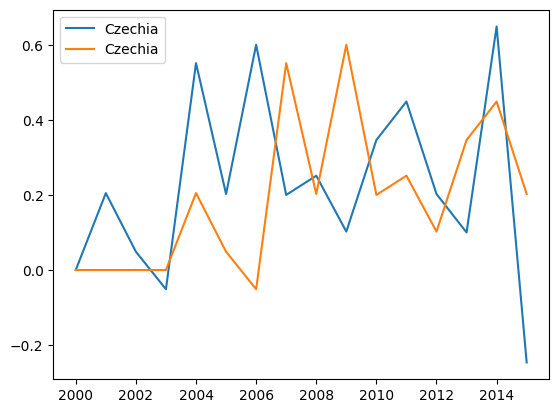

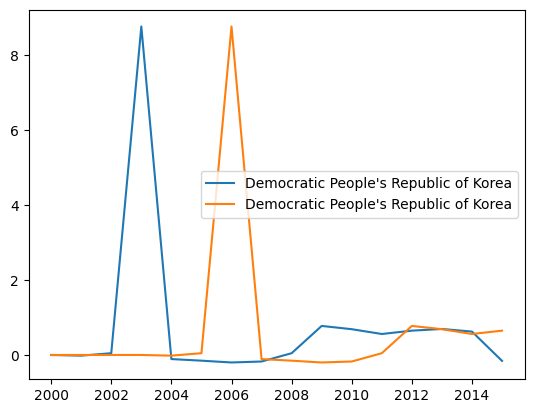

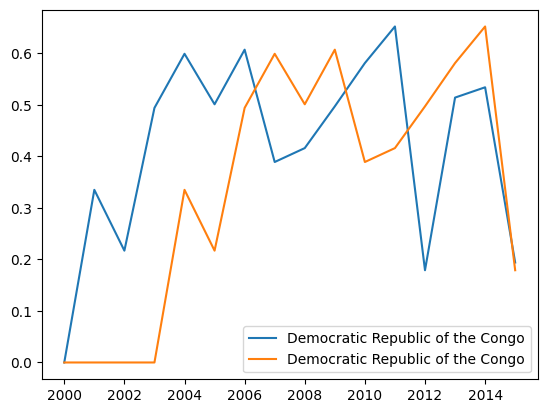

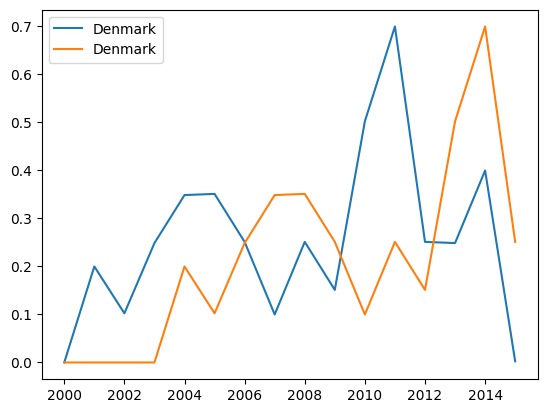

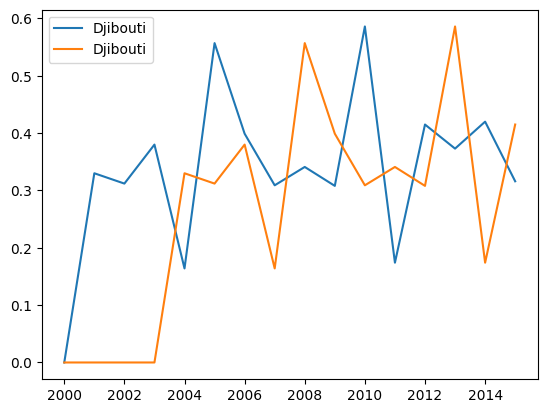

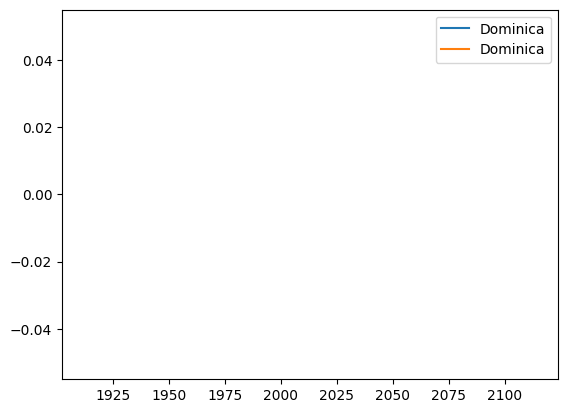

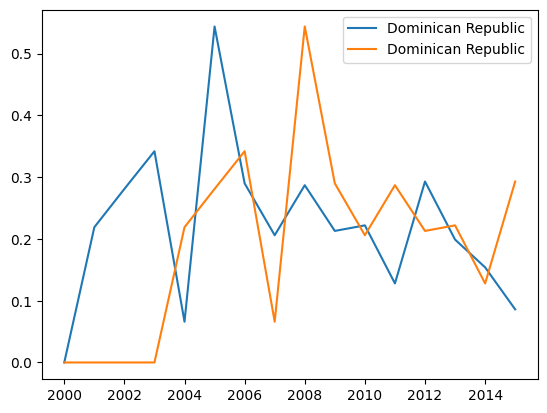

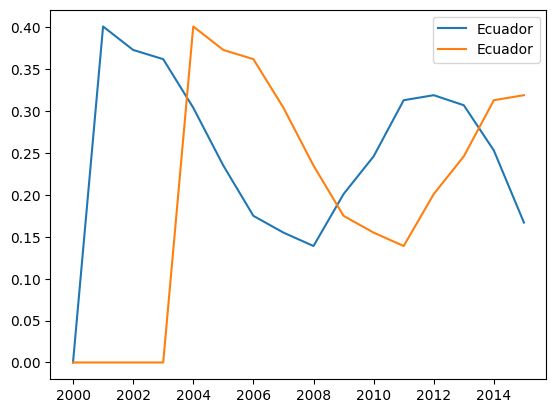

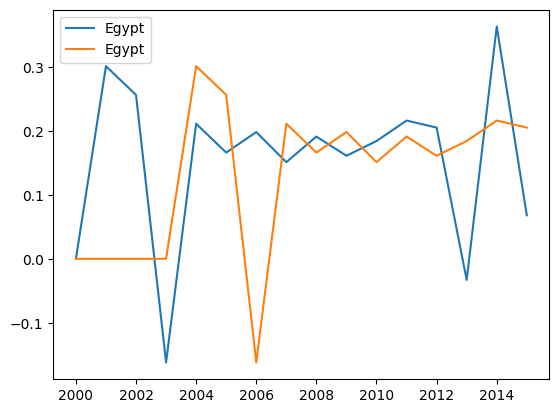

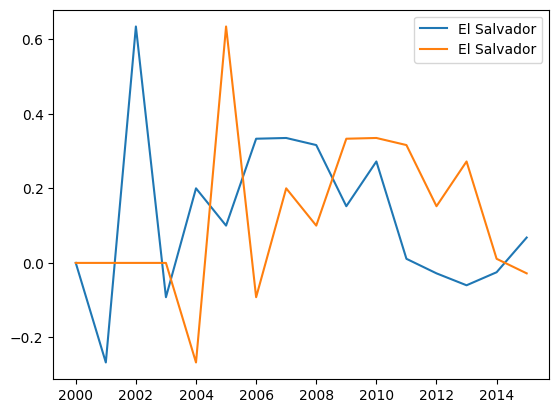

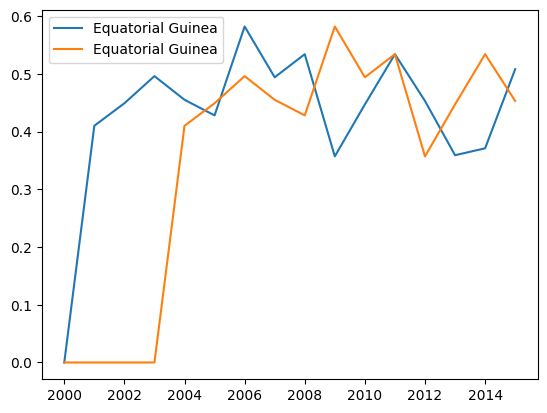

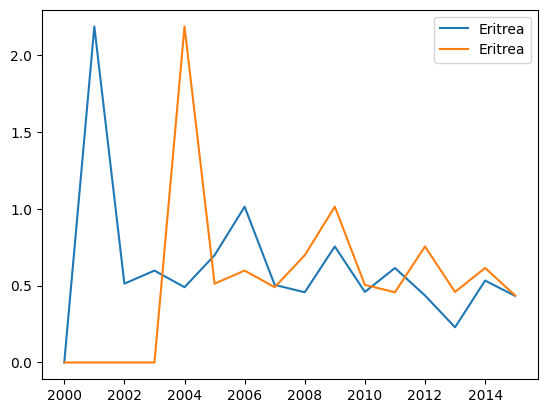

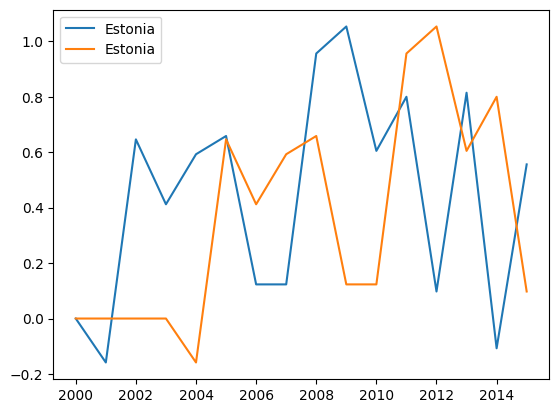

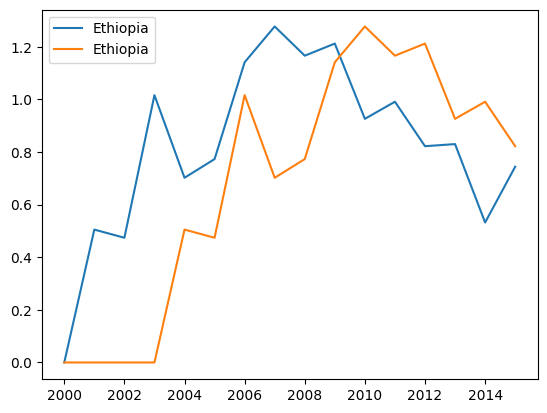

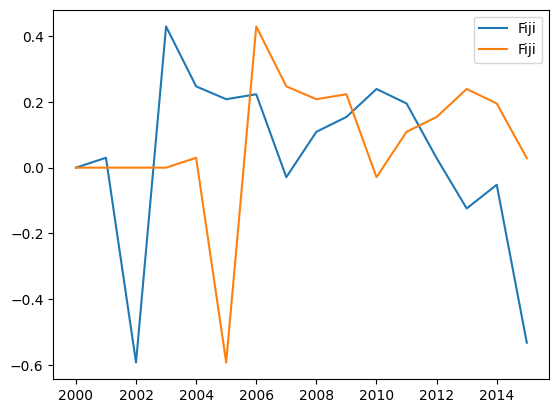

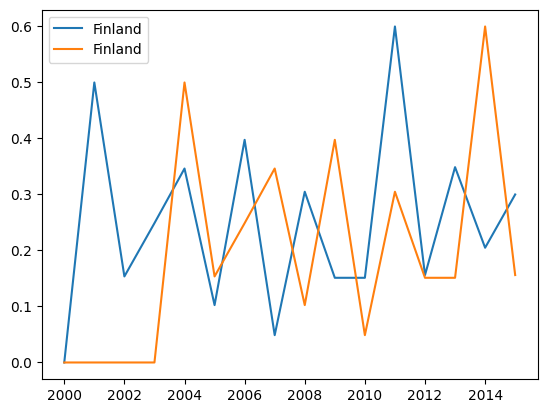

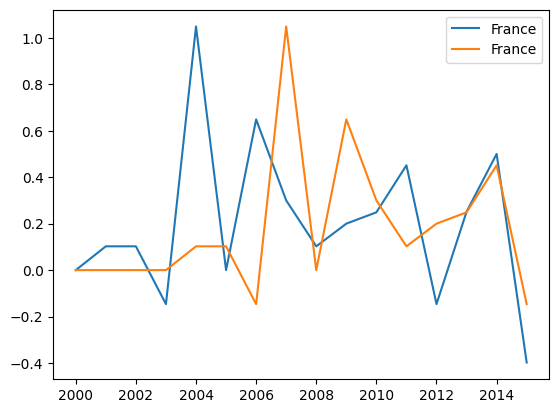

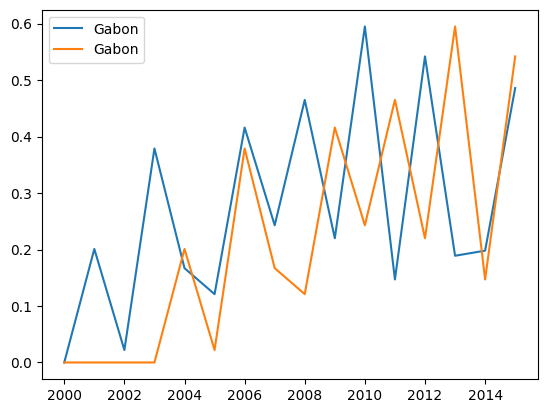

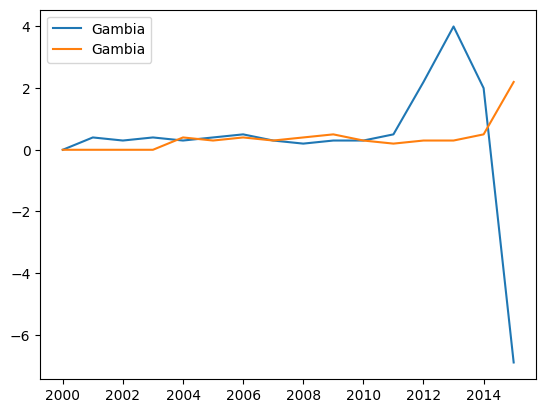

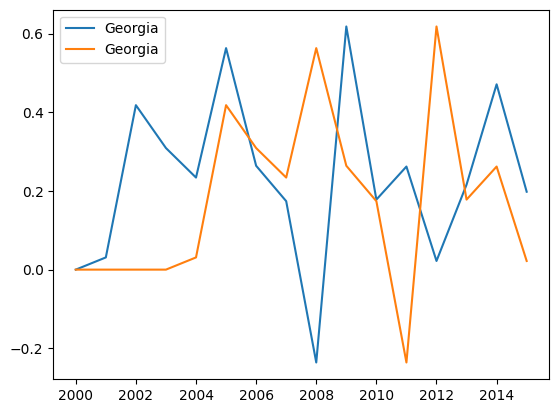

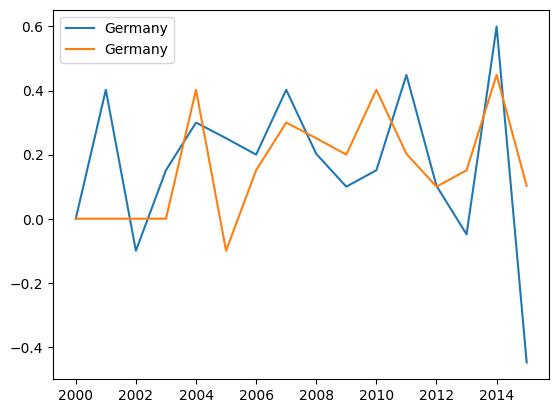

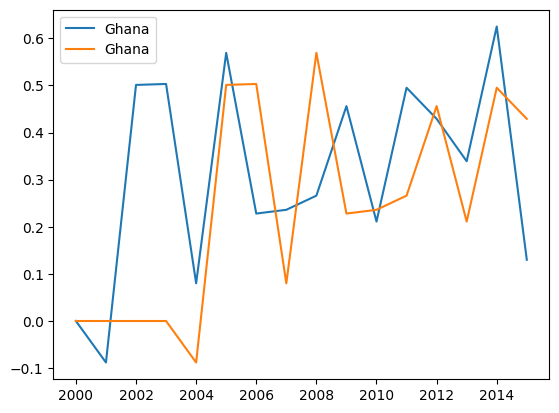

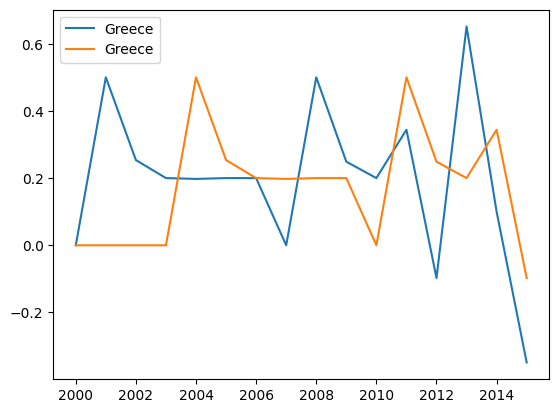

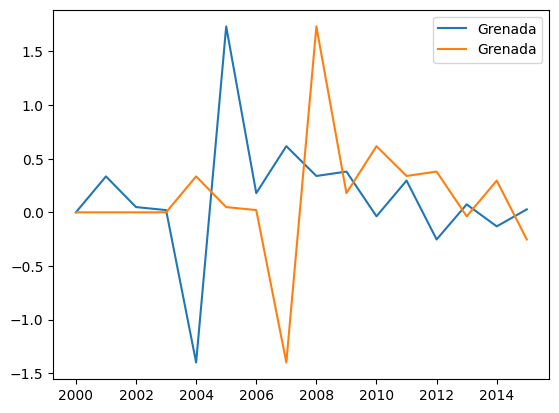

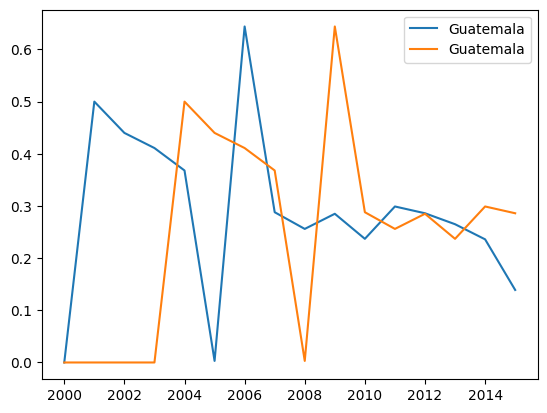

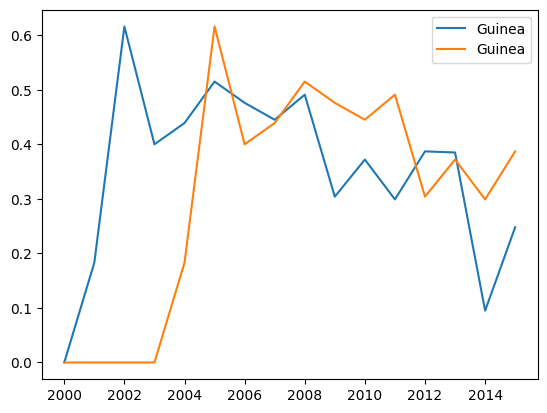

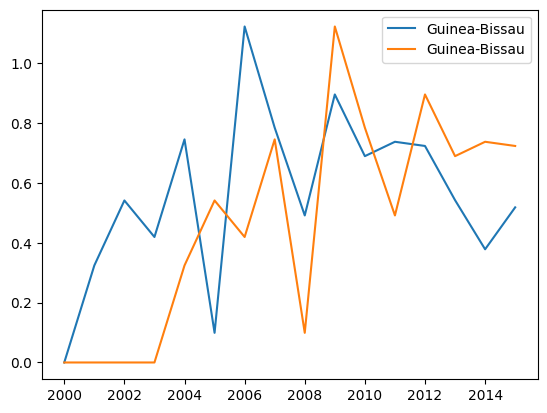

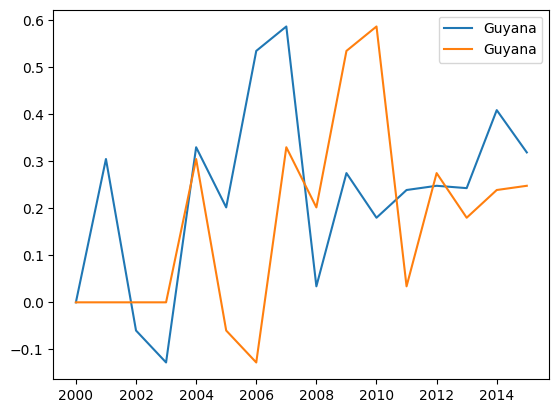

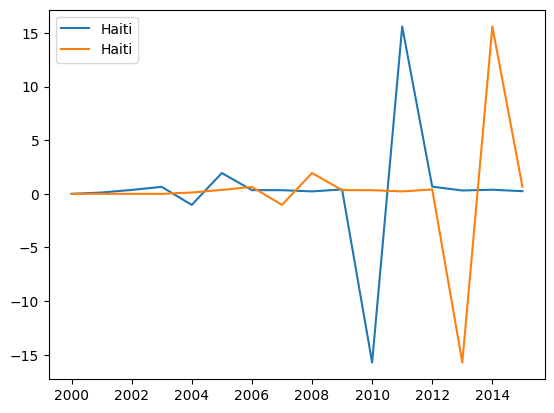

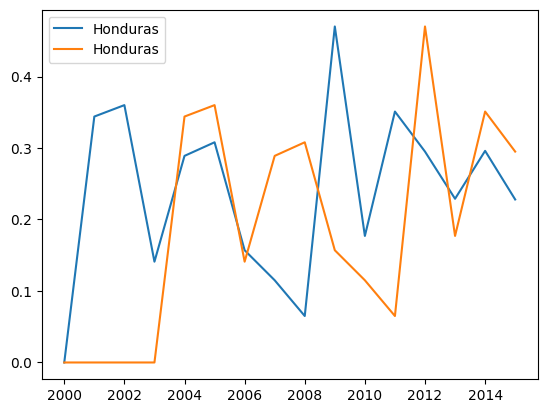

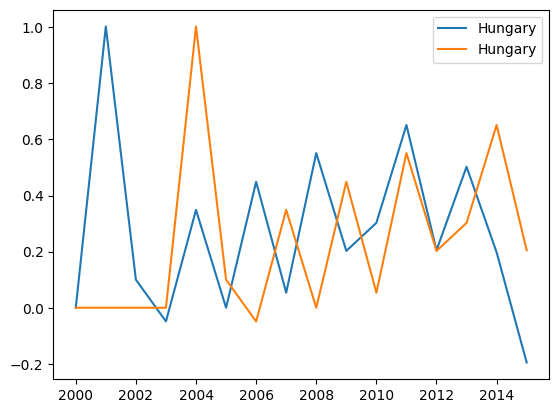

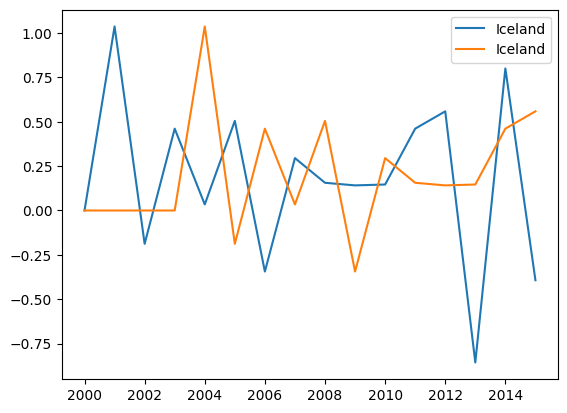

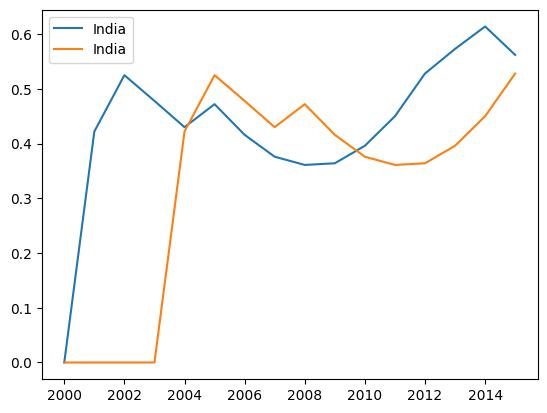

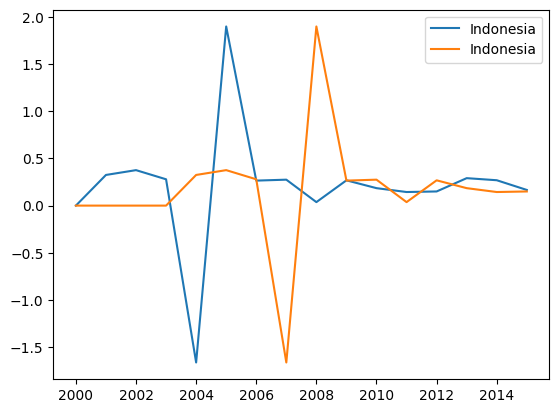

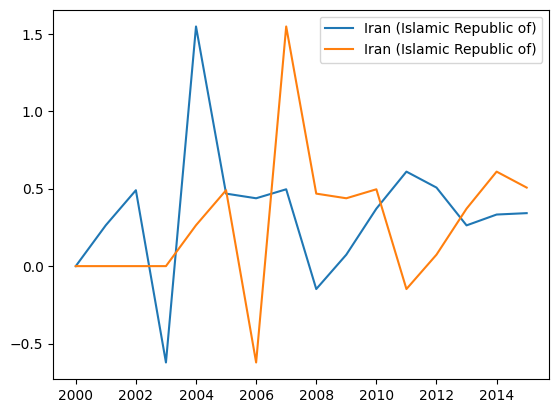

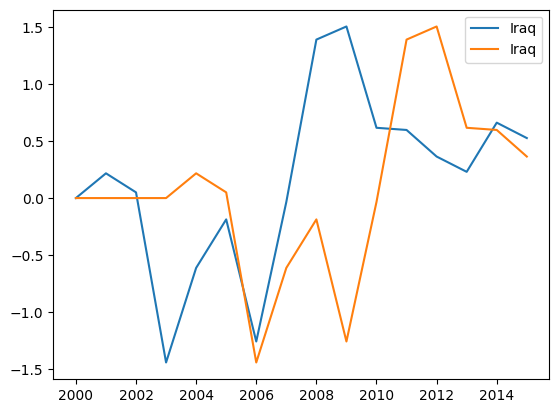

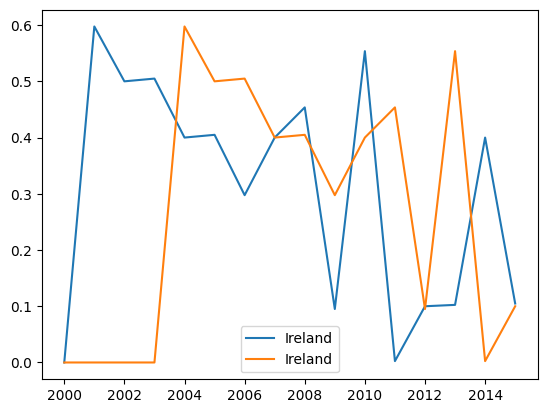

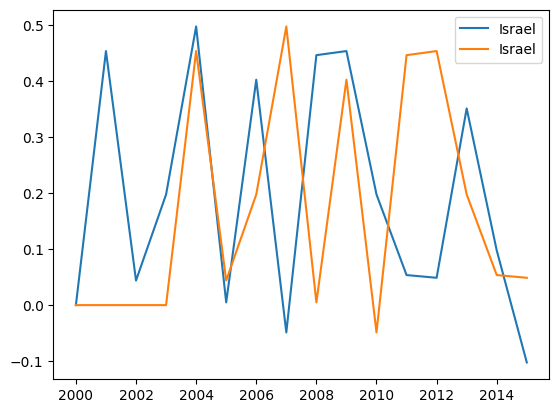

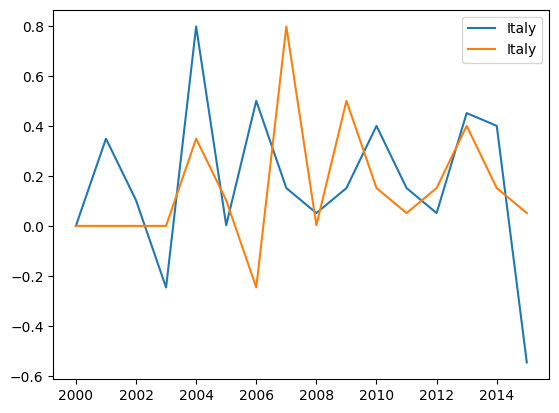

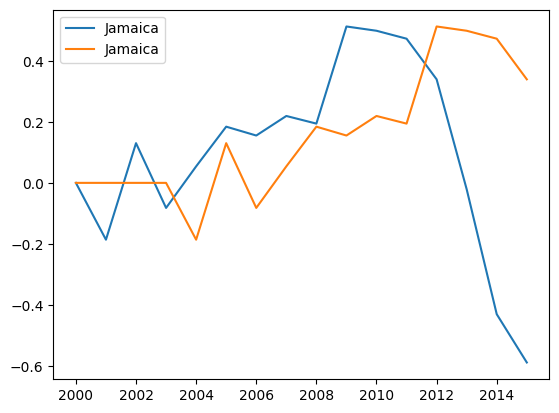

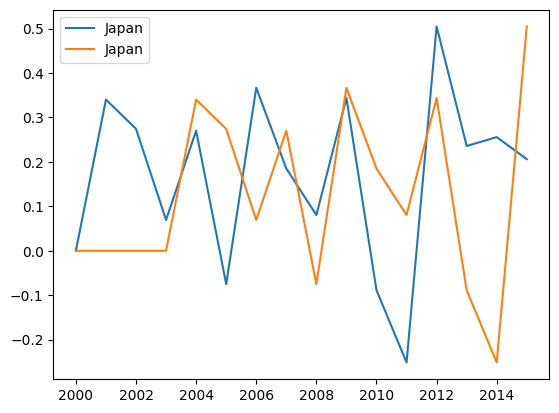

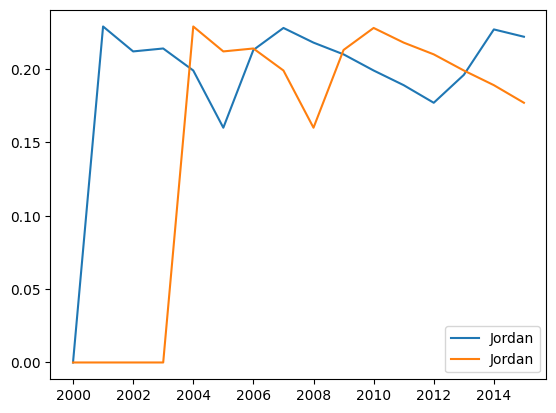

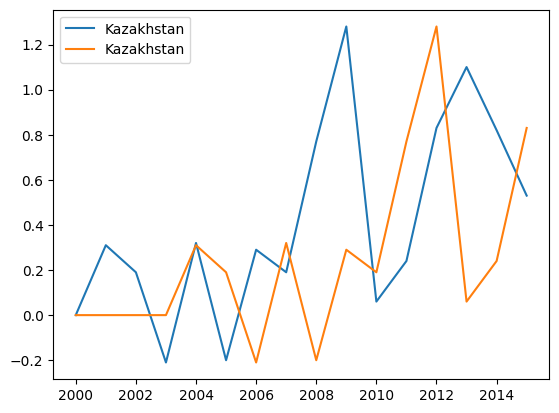

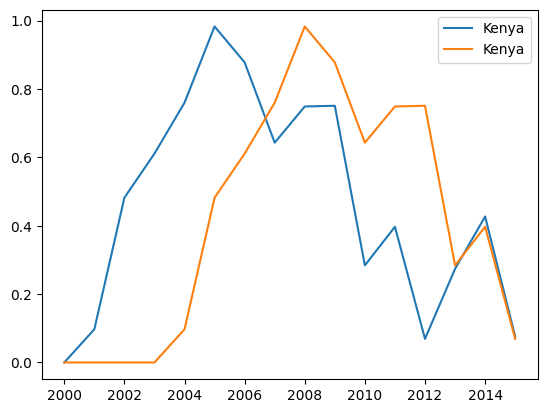

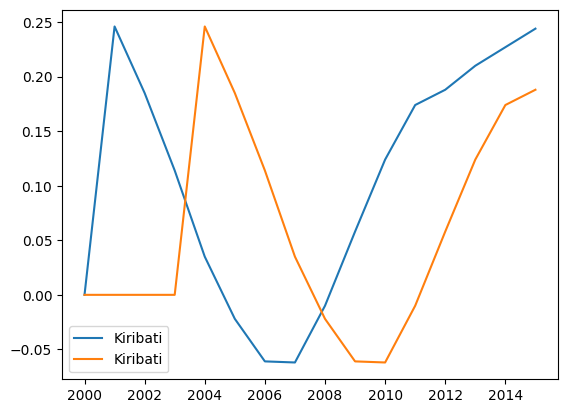

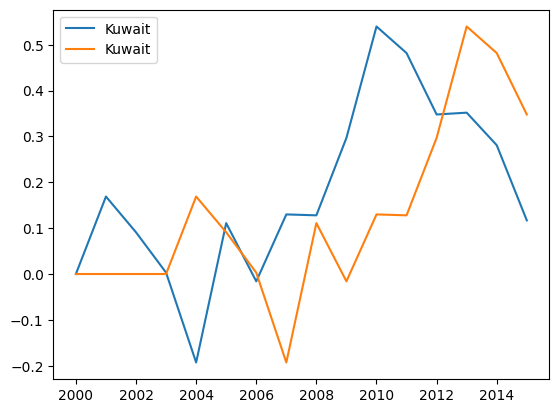

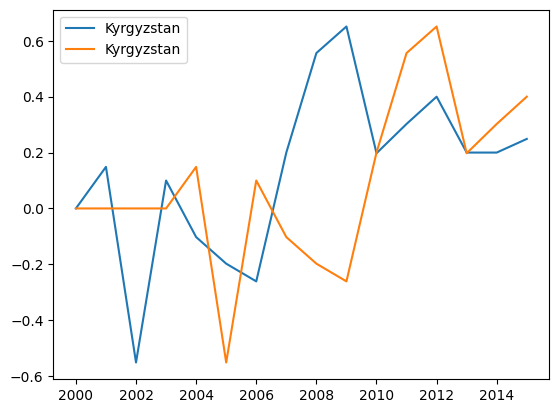

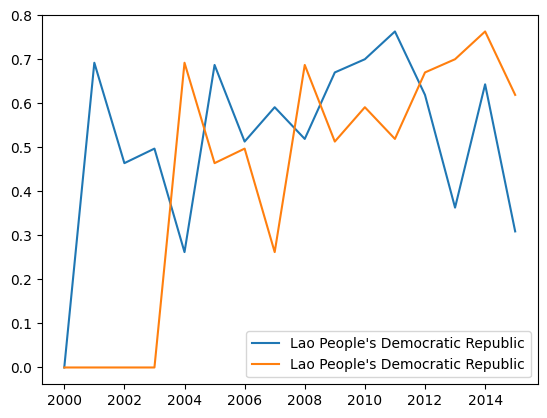

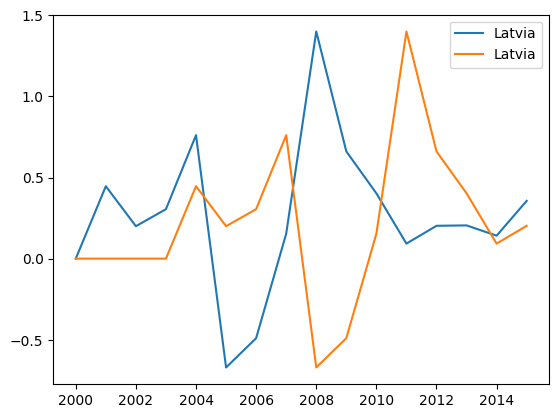

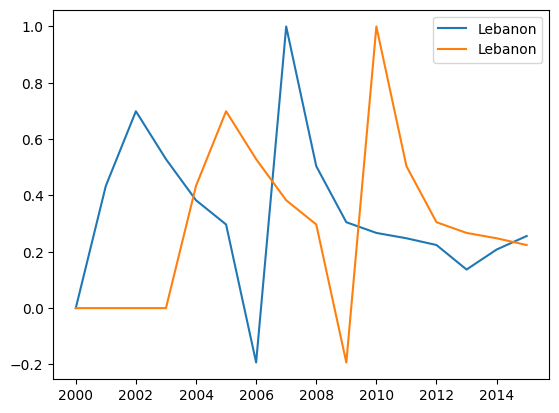

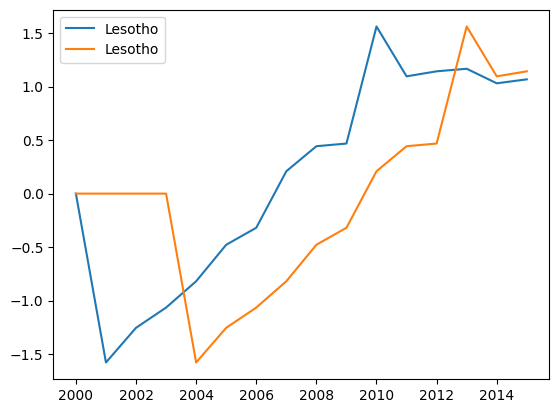

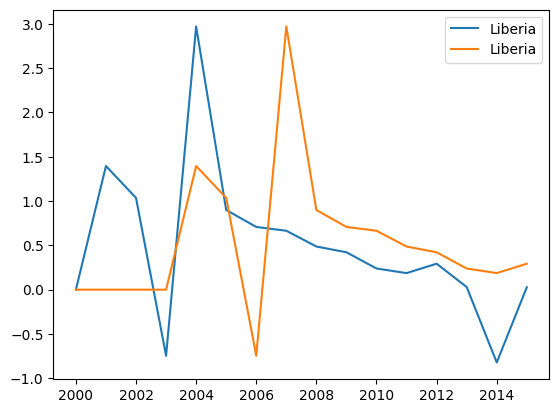

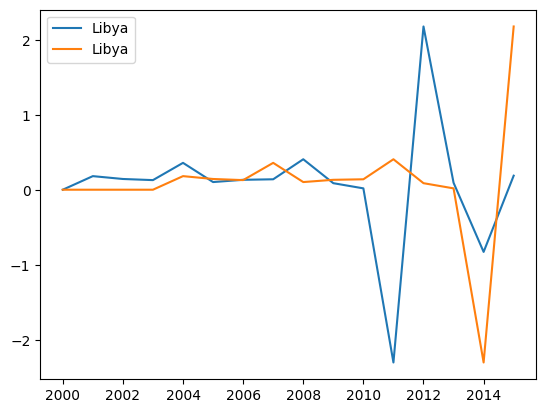

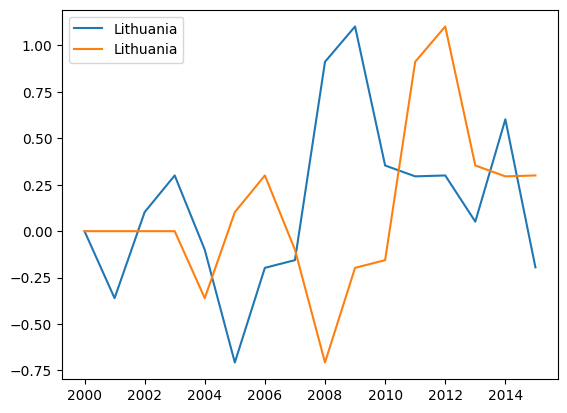

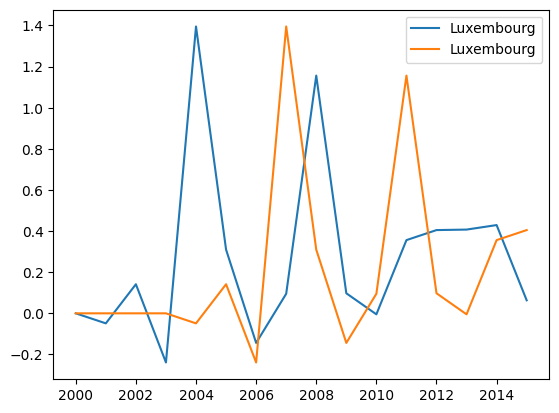

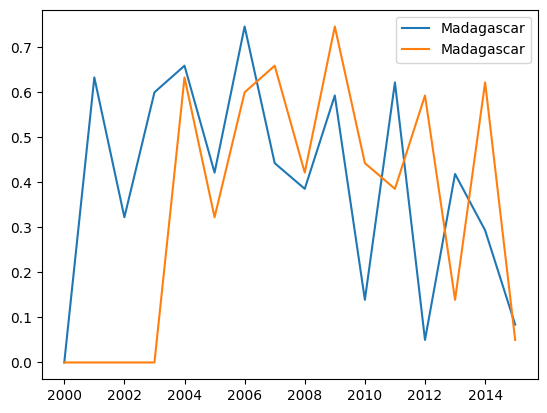

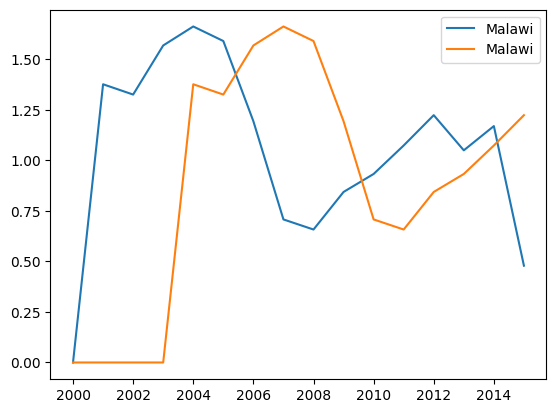

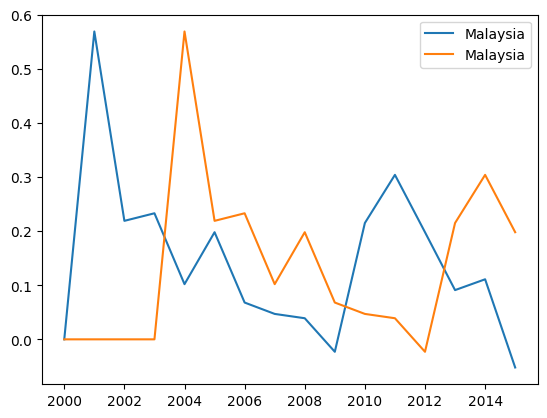

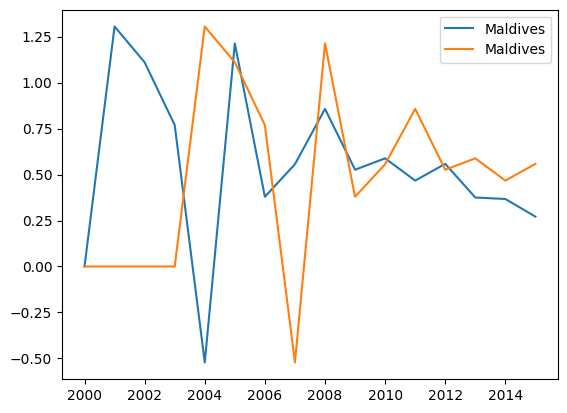

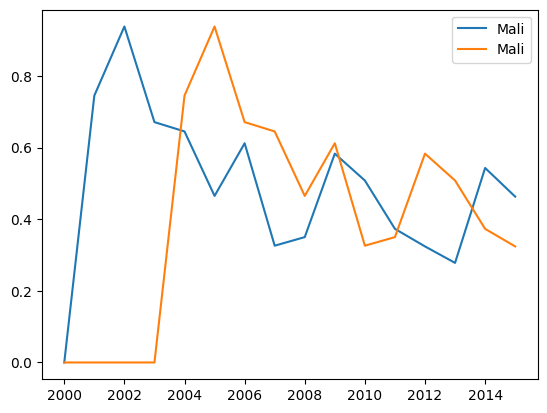

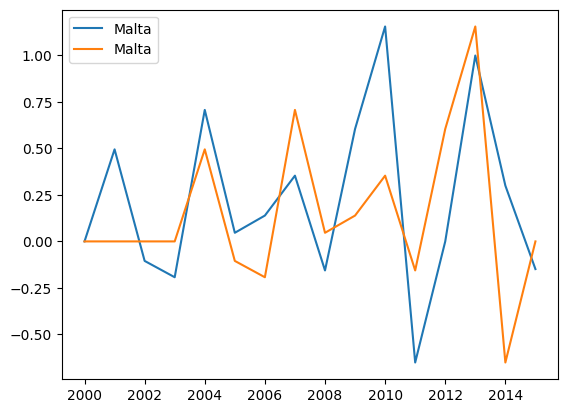

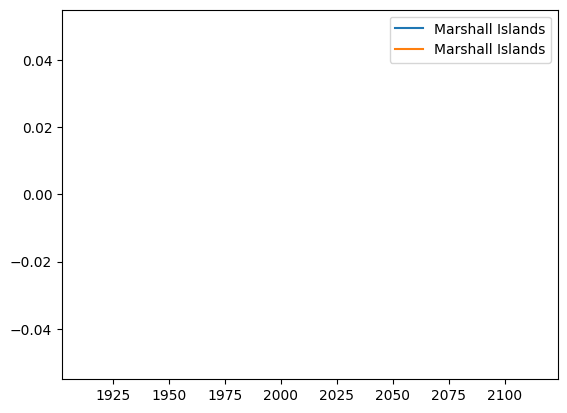

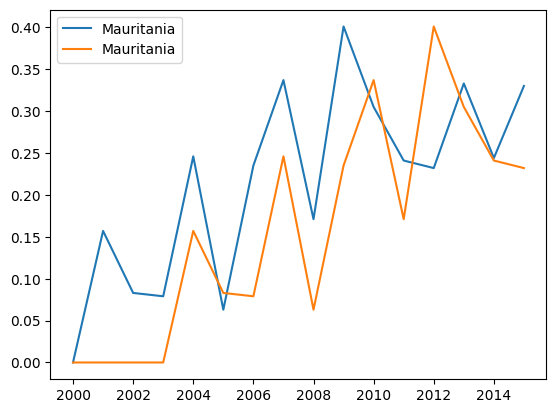

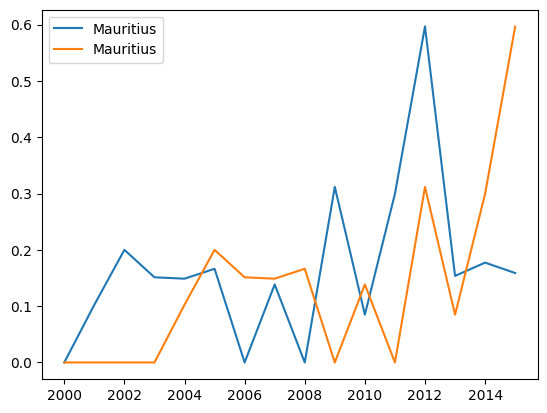

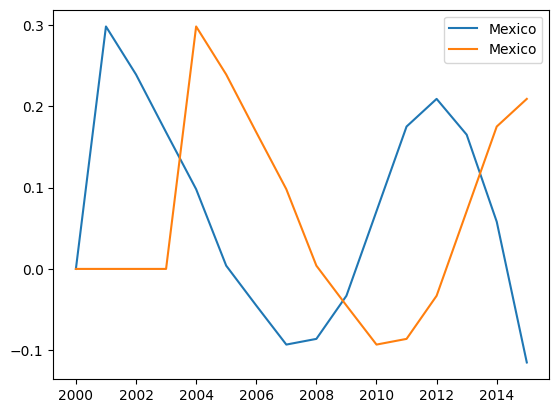

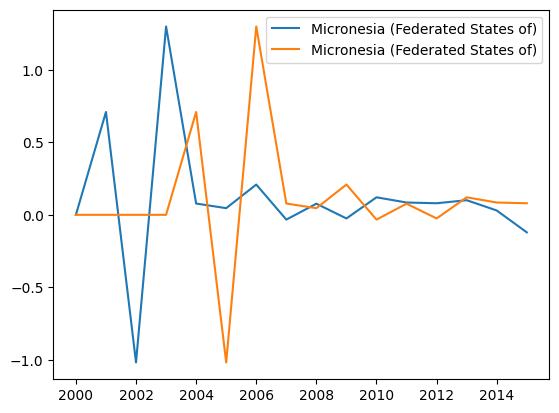

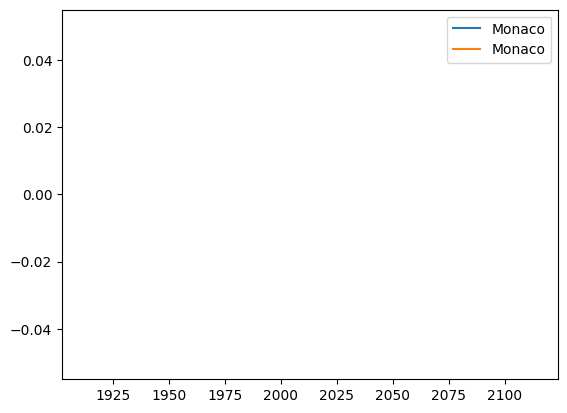

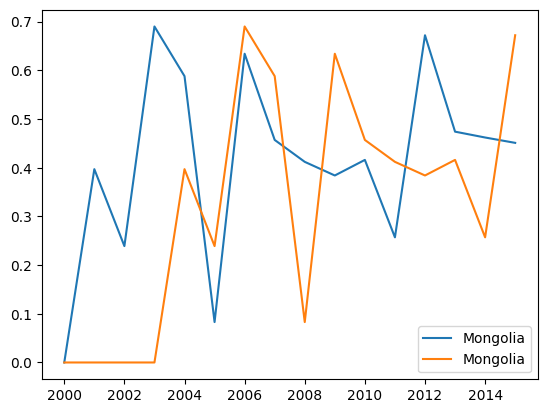

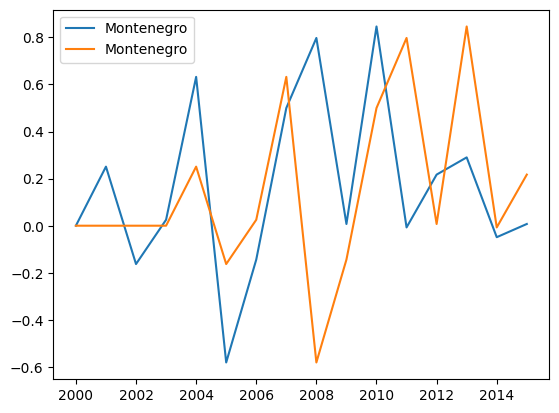

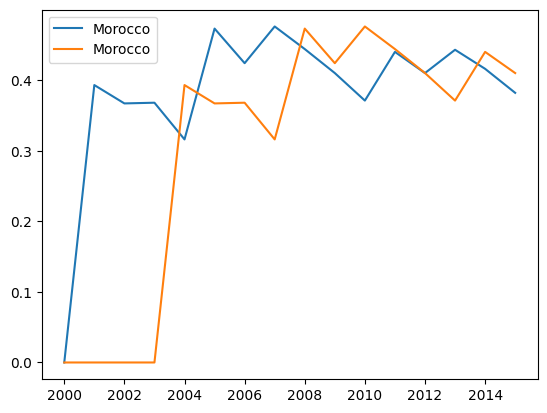

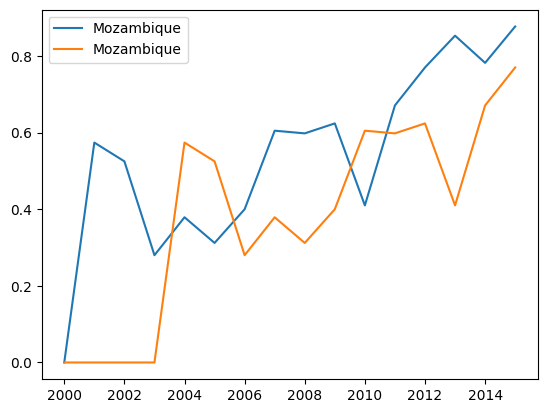

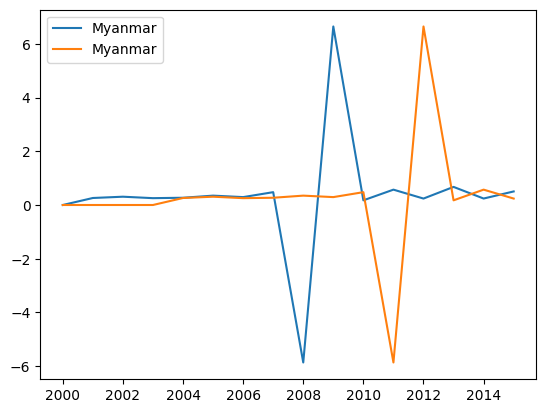

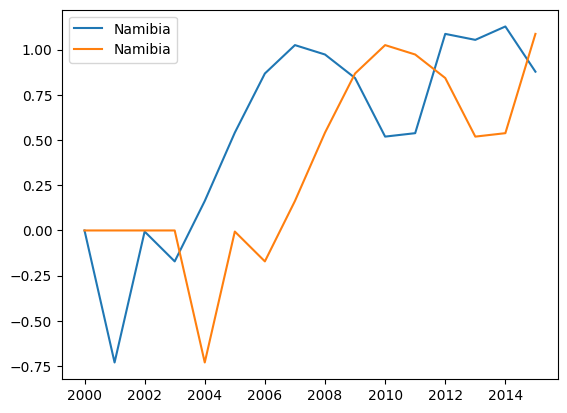

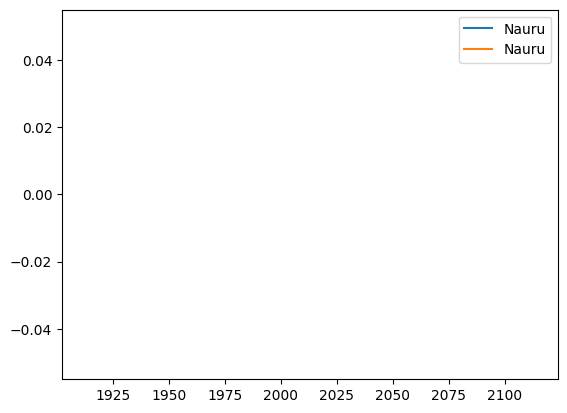

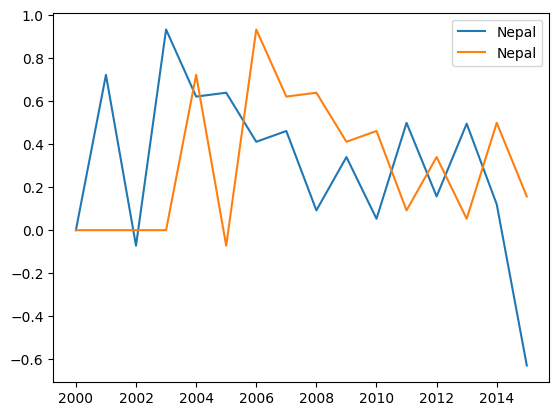

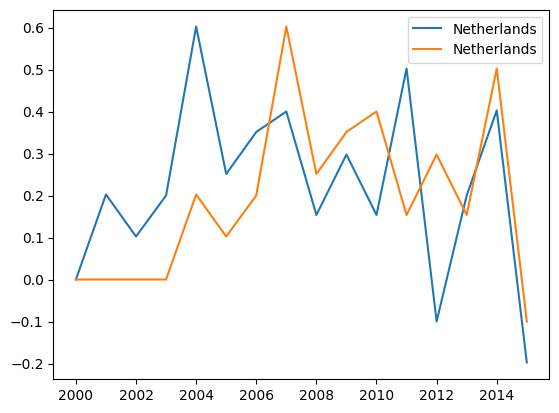

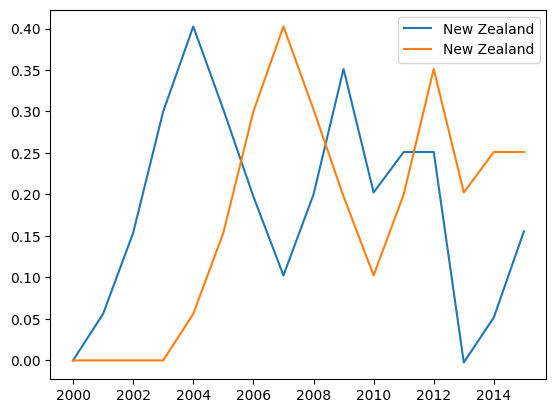

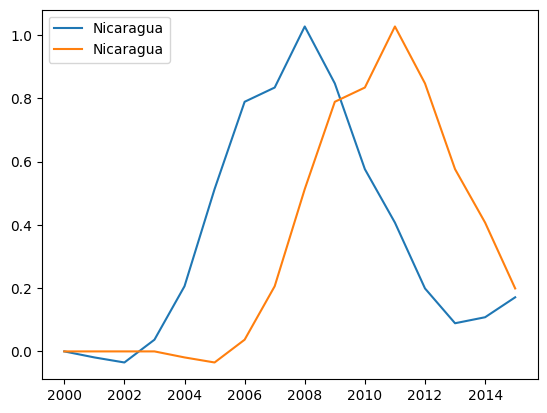

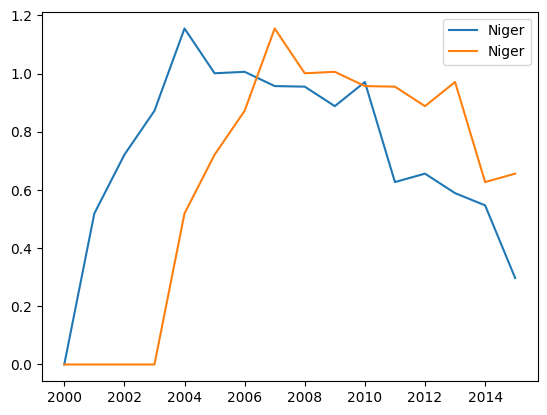

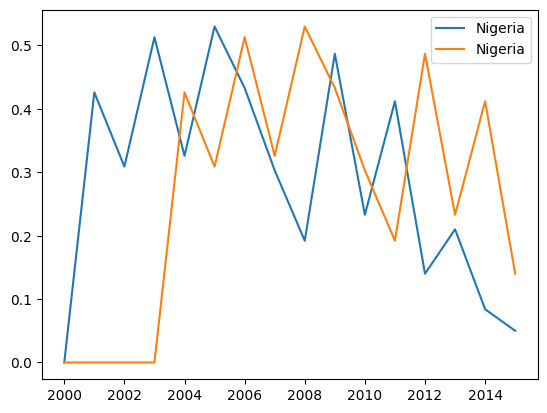

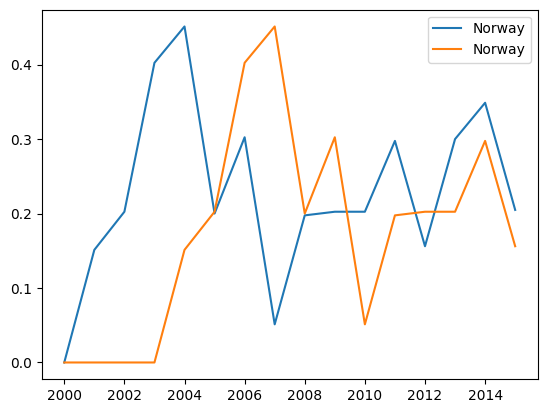

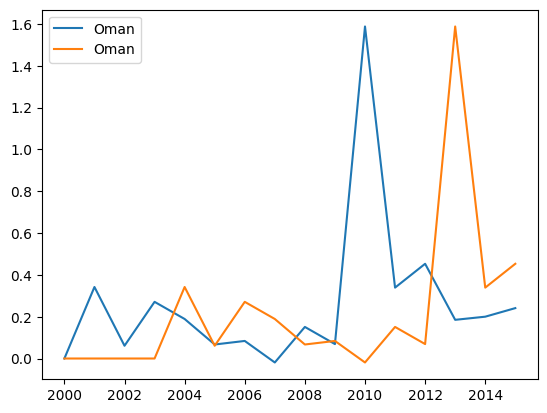

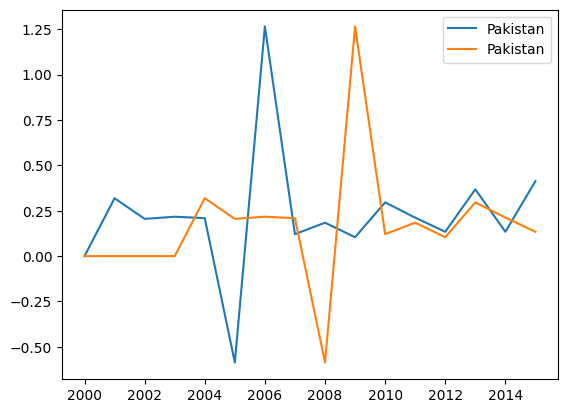

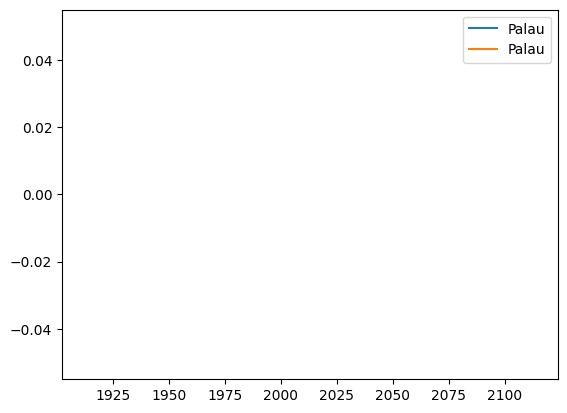

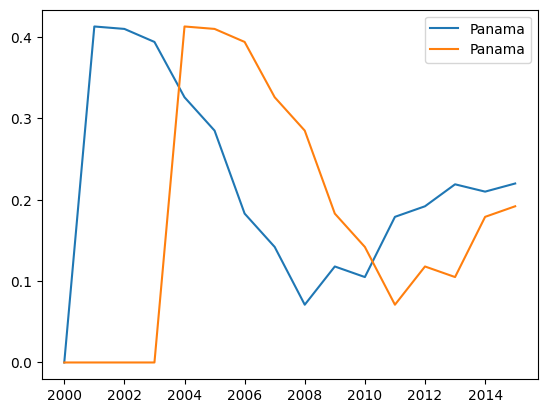

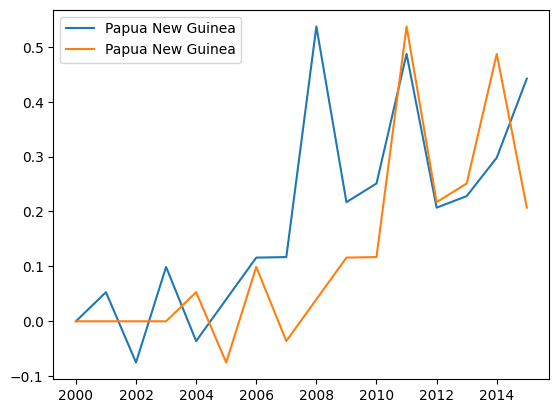

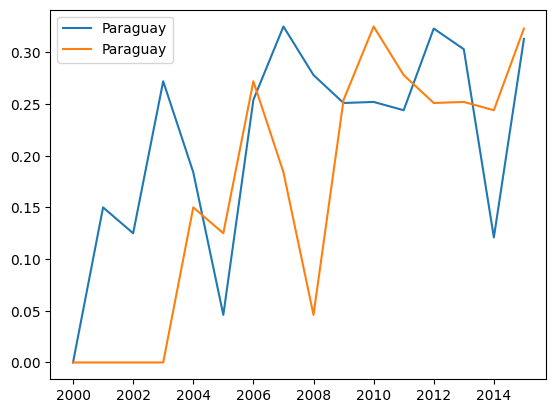

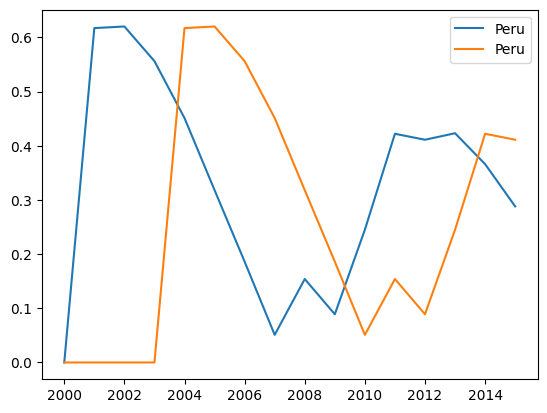

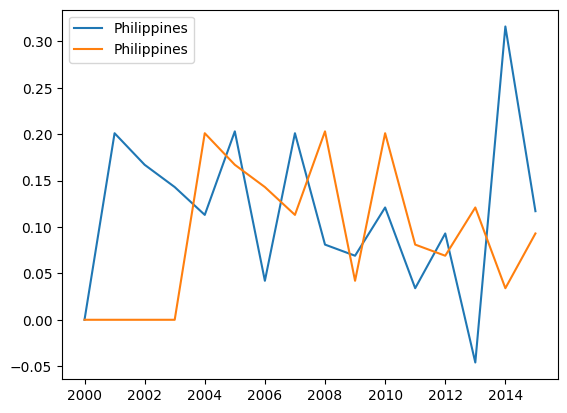

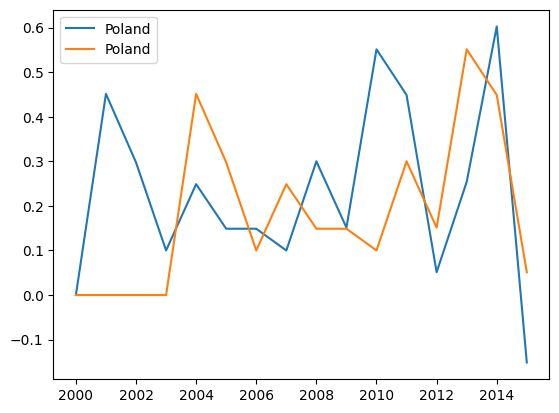

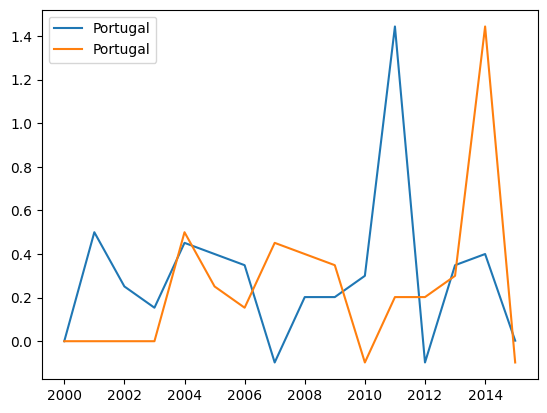

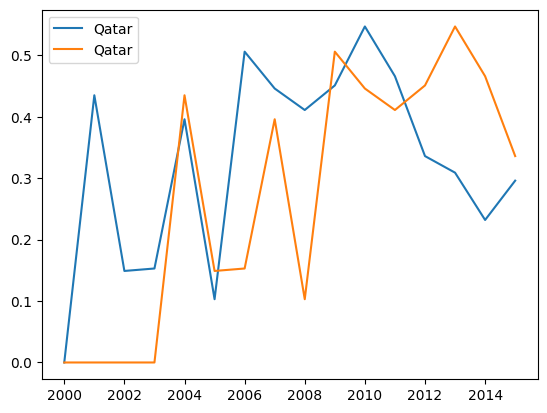

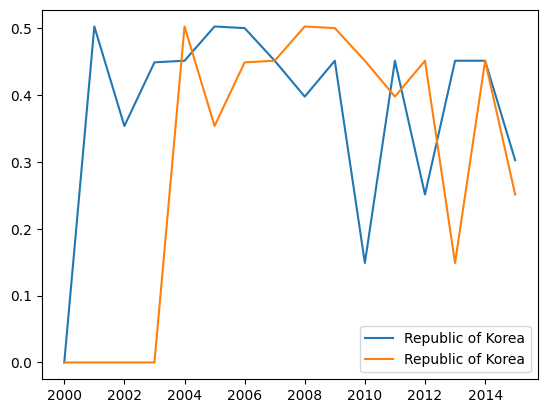

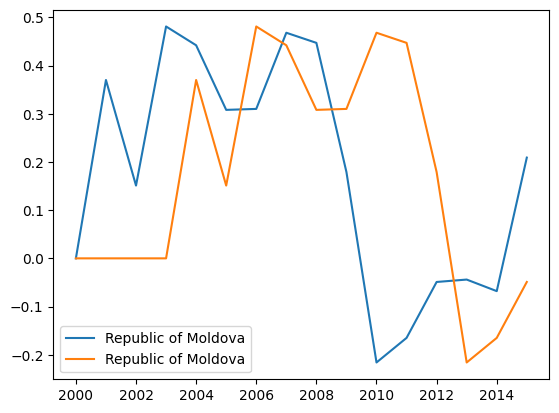

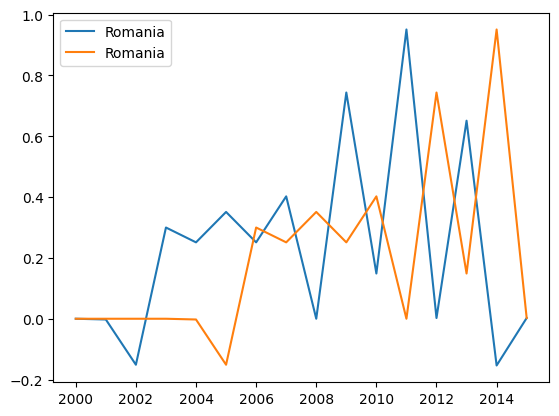

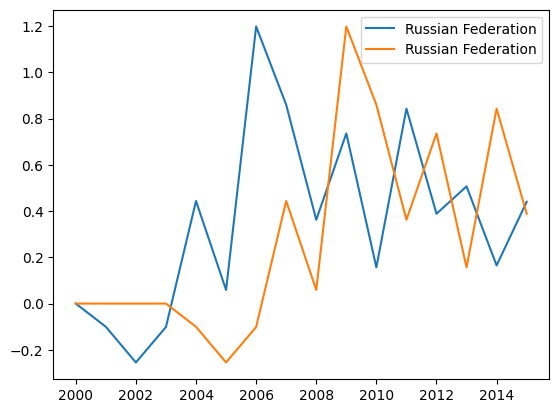

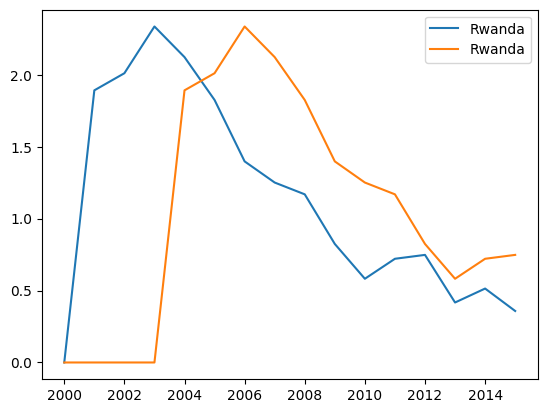

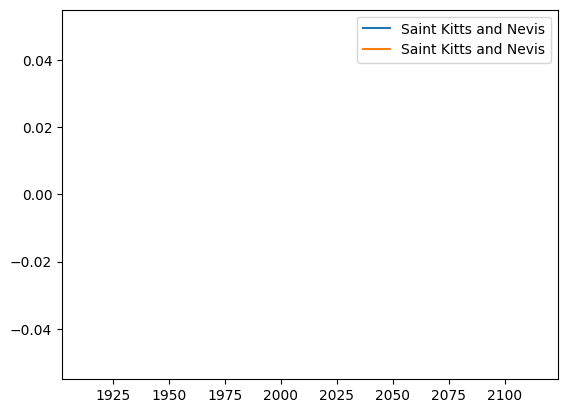

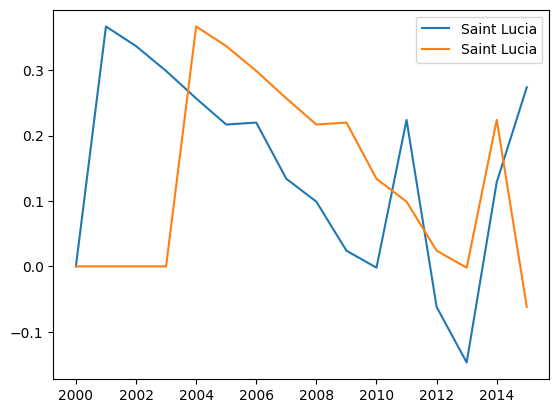

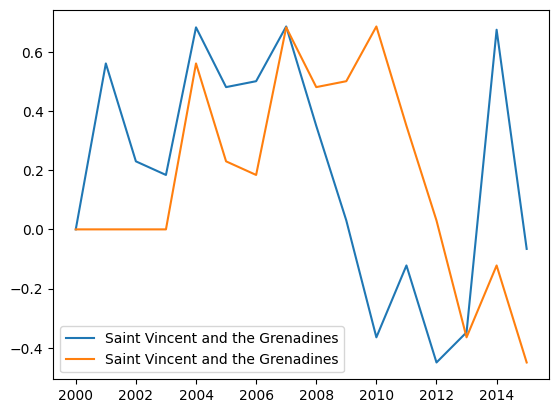

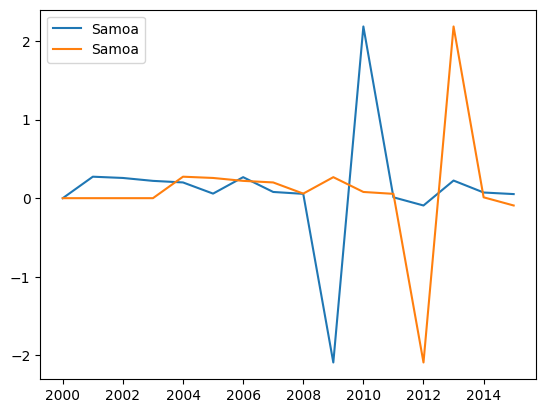

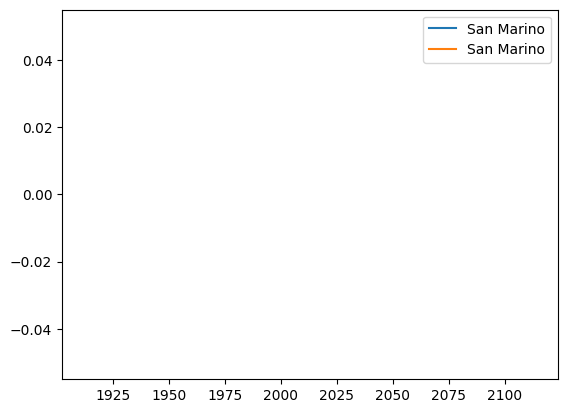

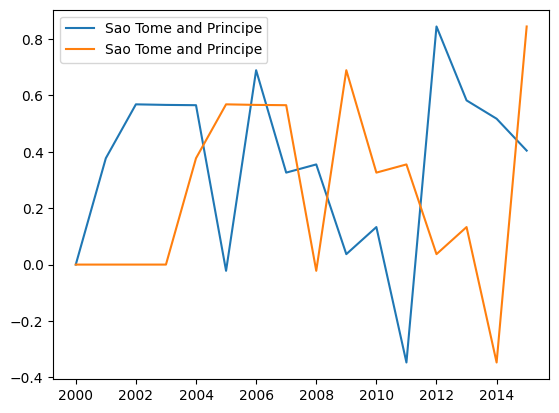

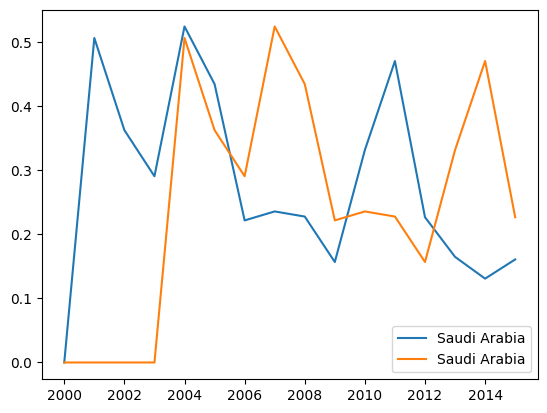

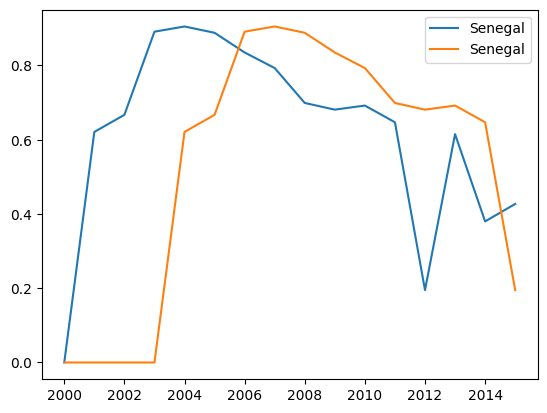

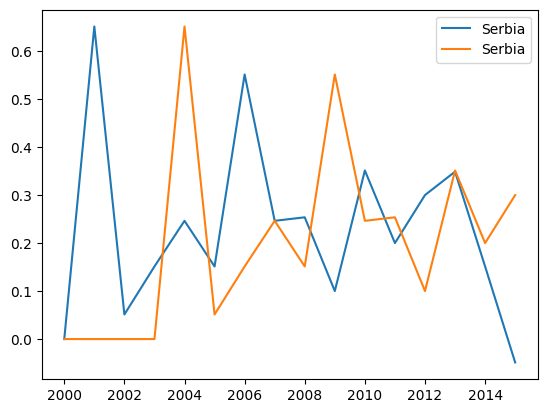

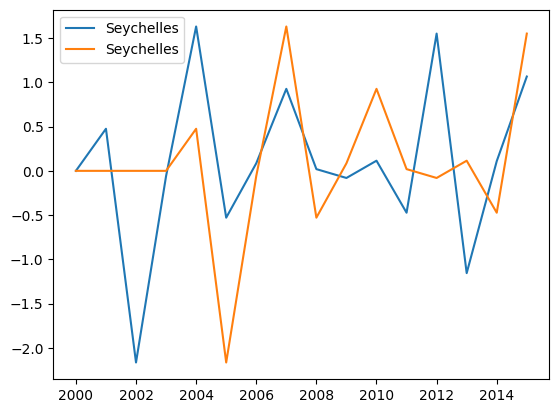

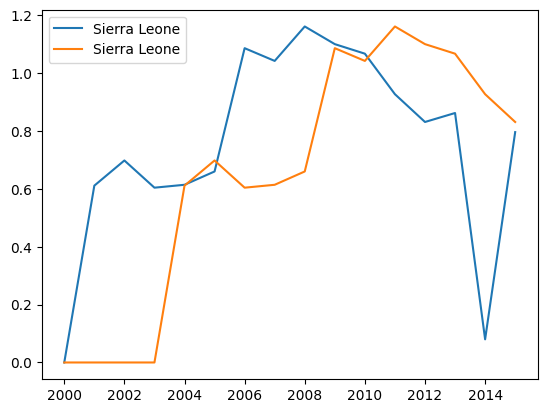

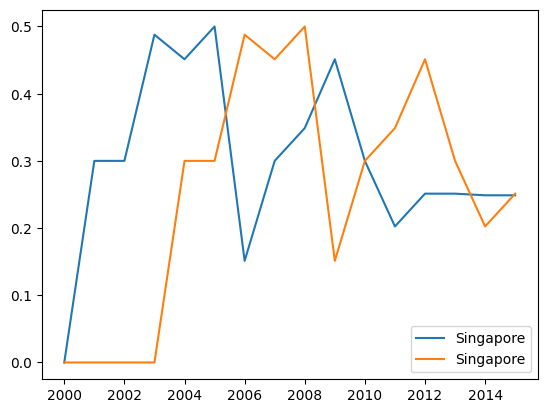

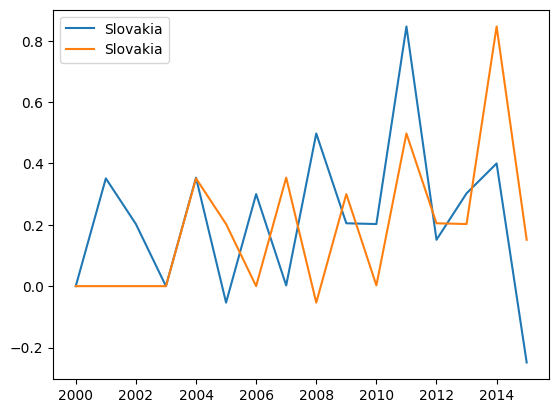

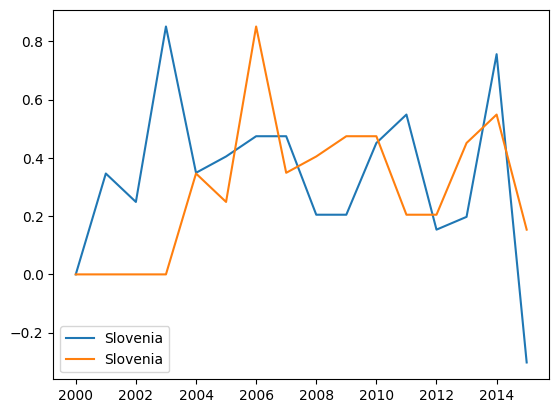

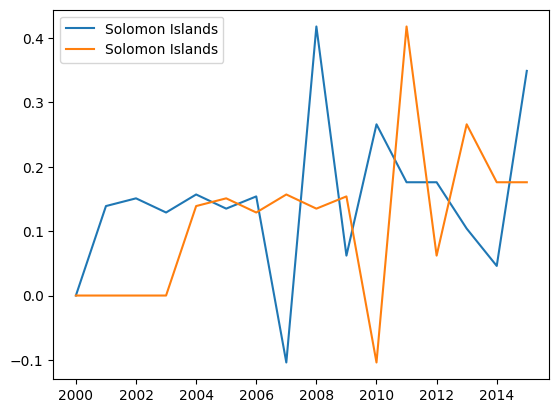

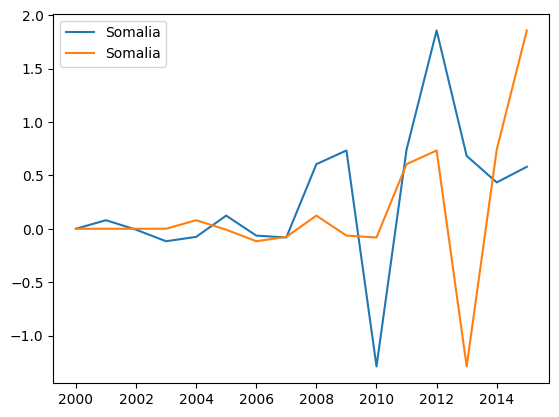

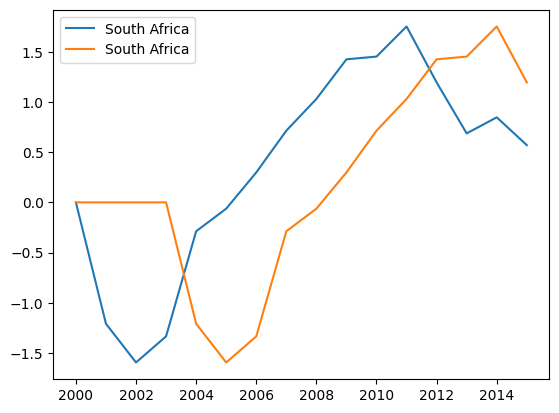

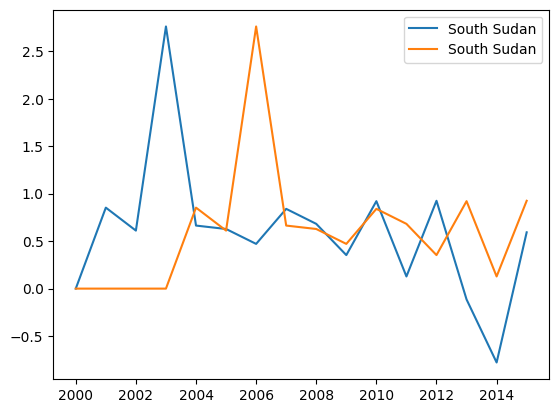

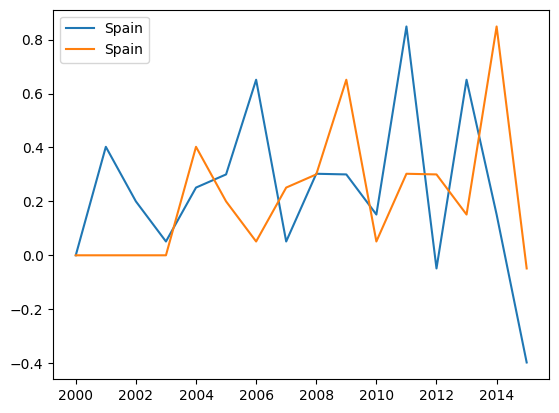

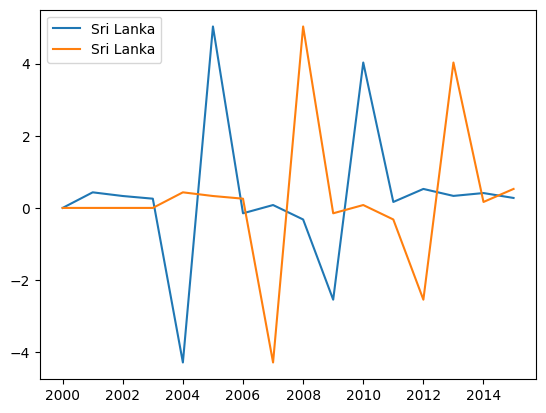

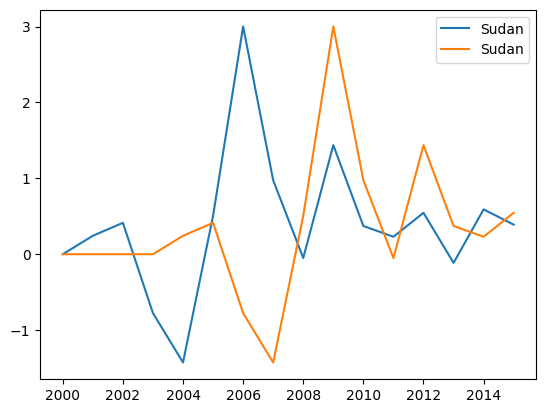

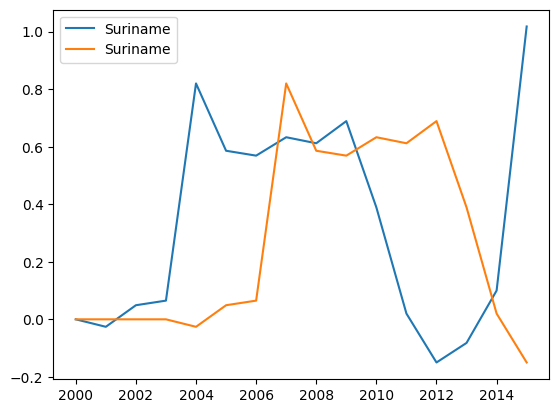

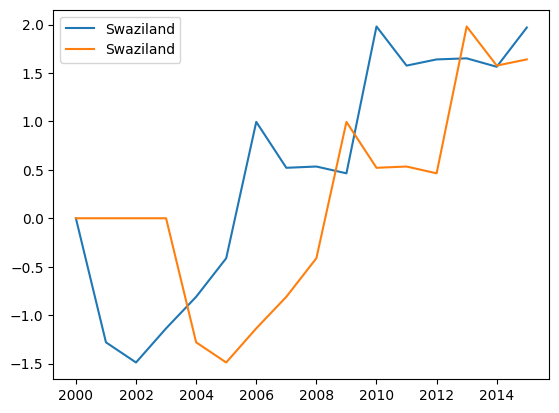

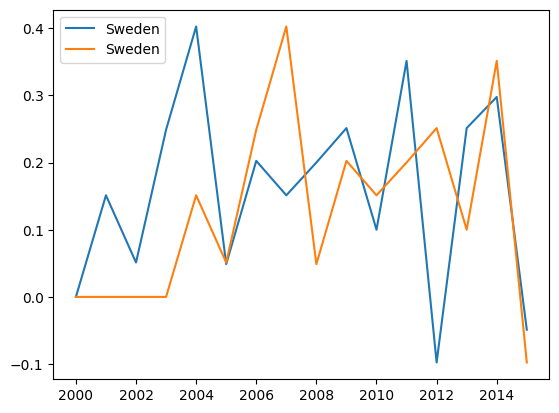

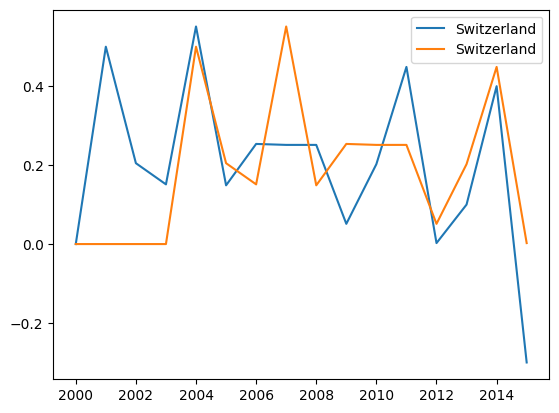

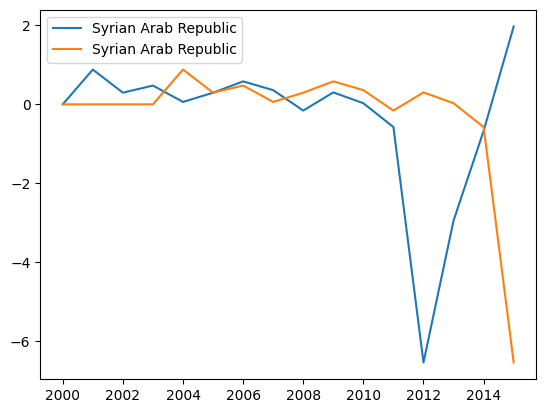

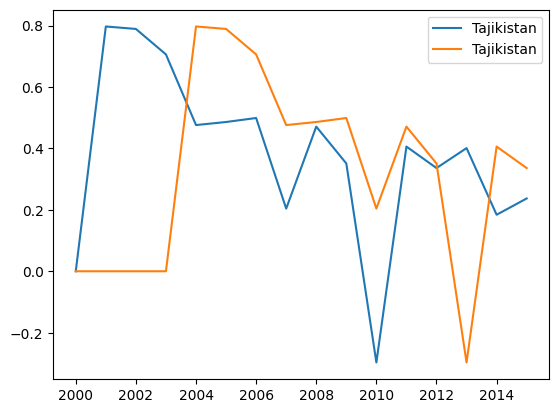

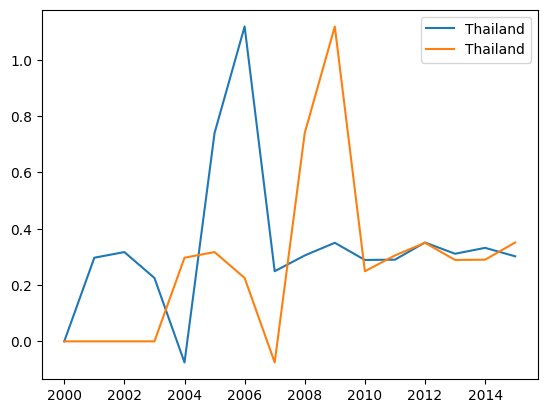

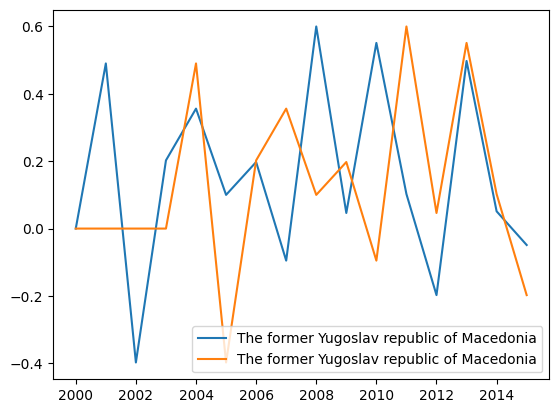

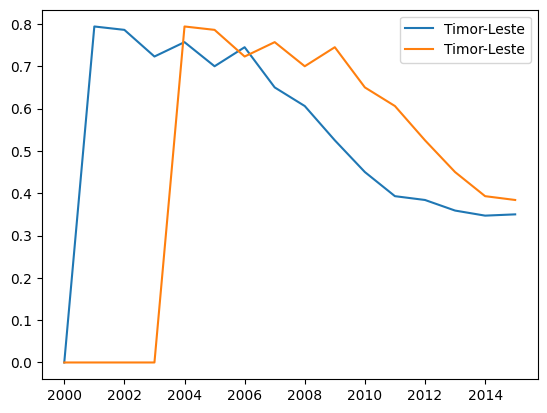

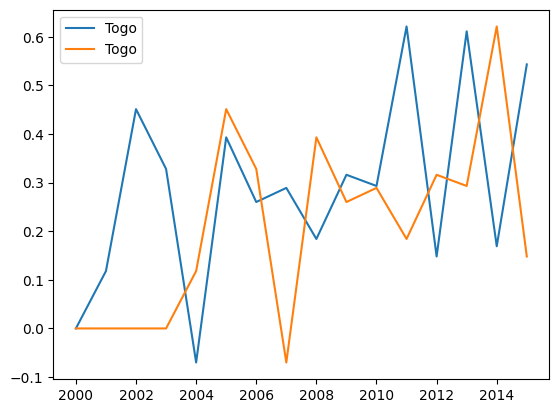

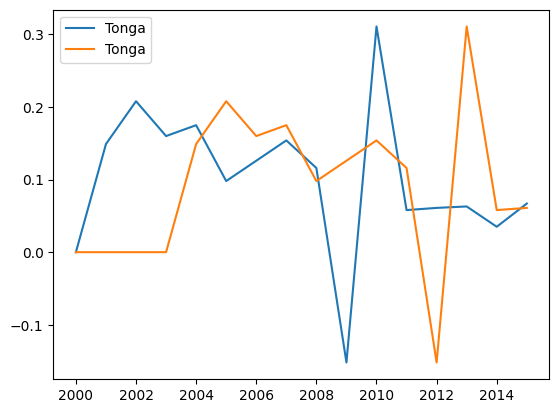

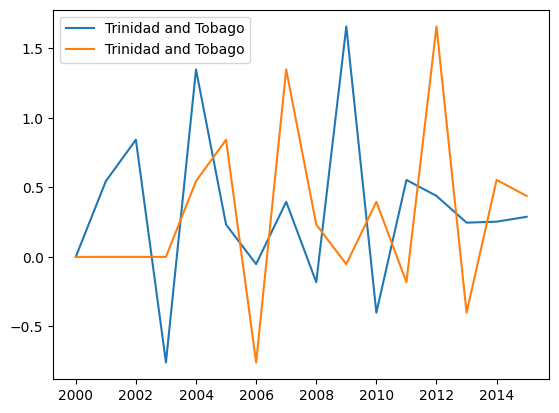

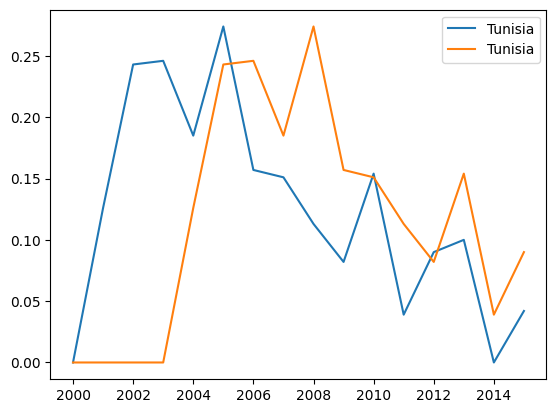

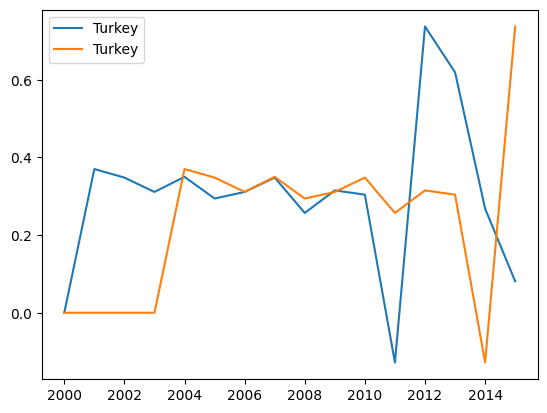

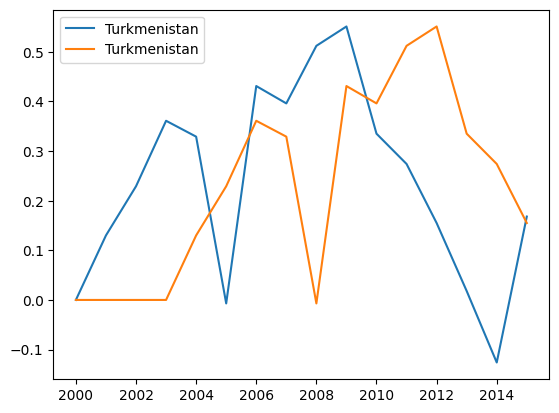

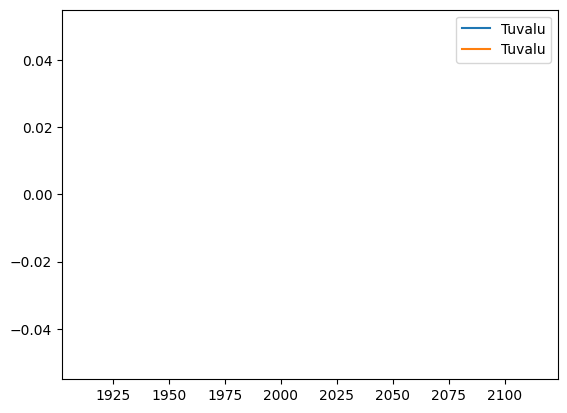

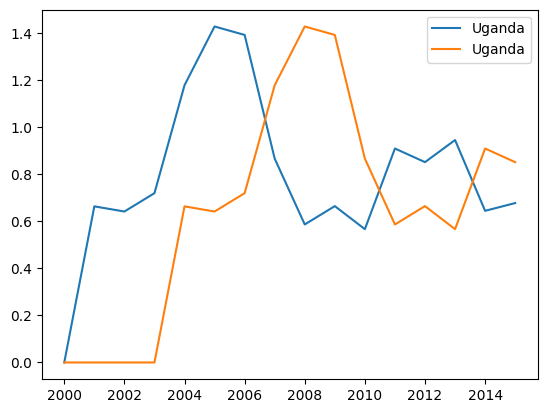

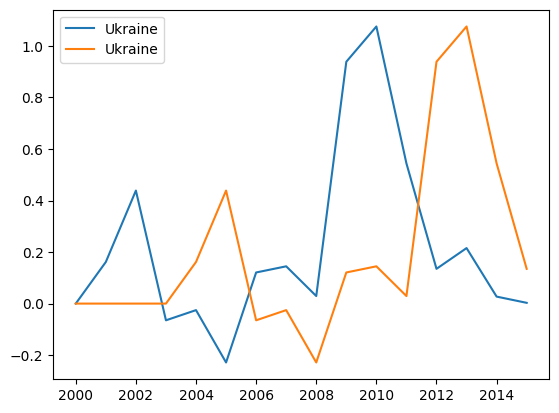

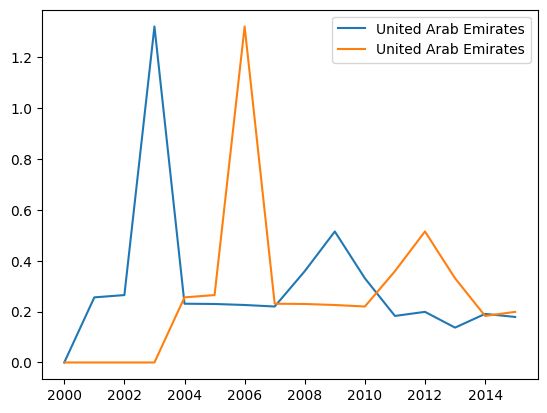

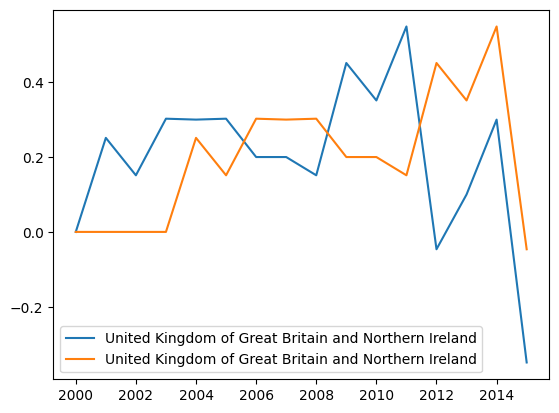

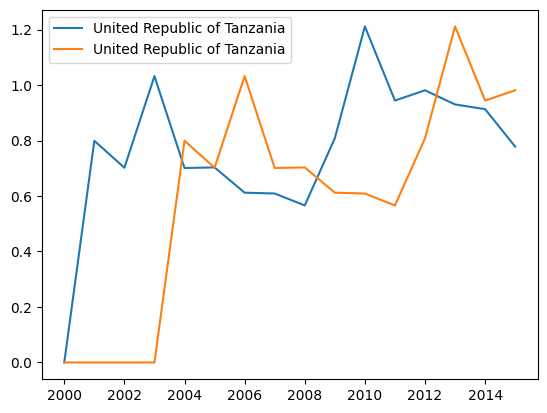

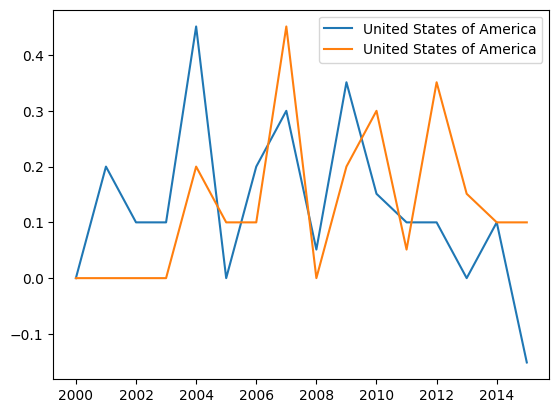

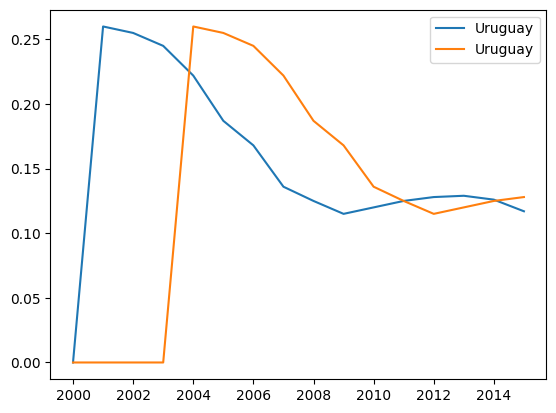

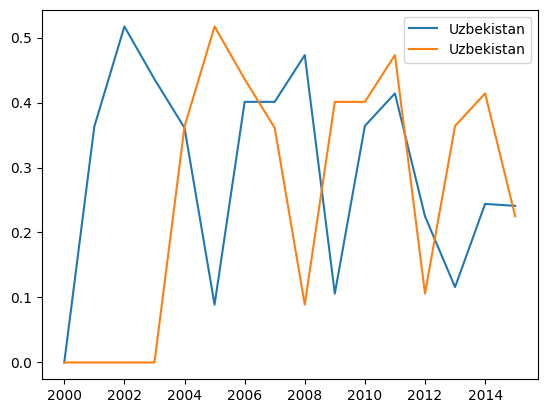

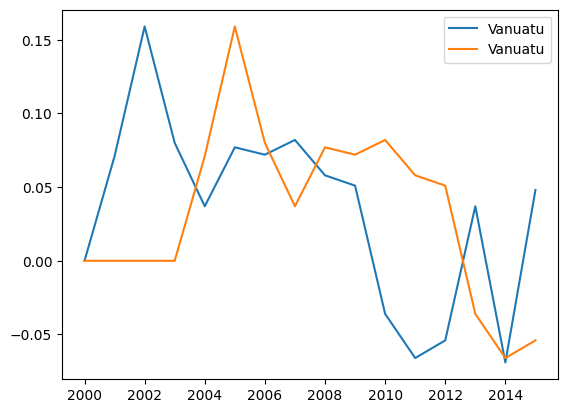

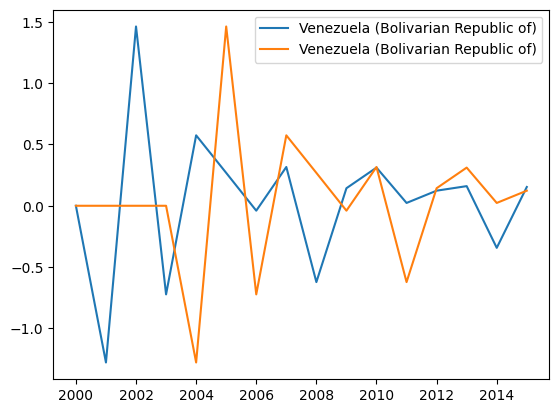

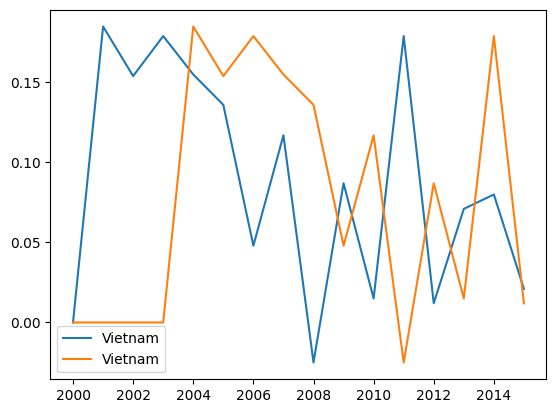

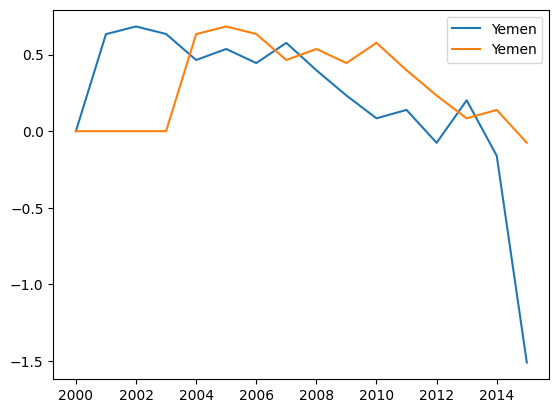

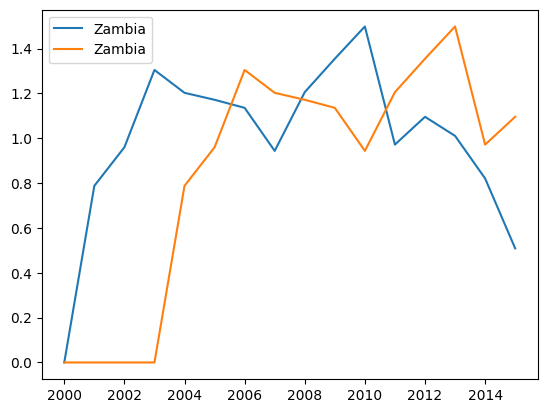

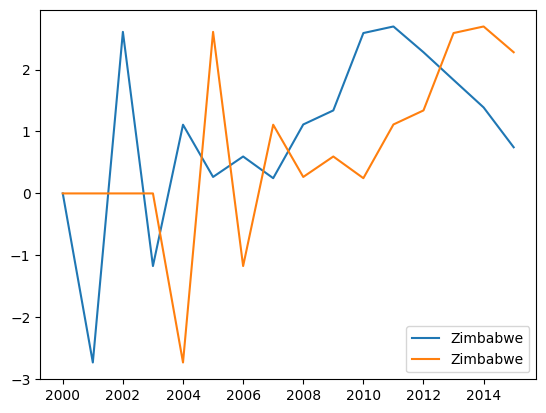

In [44]:
# plot life expectancy of each country over time
for country in data['Country'].unique():
    d = data[data['Country'] == country]
    plt.plot(d['Year'], d['Life expectancy difference'], label=country)
    plt.plot(d['Year'], d['Life expectancy difference 3 years ago'], label=country)
    plt.legend()
    plt.show() 